In [1]:
# For data reading, processing and manipulation
import pandas as pd
import numpy as np

#For data plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')


pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing required libraries for DataPreprocessing, Feature Selection, Model Building and Evaluation
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

In [3]:
#Reading the data

data = pd.read_csv('train.csv')
data.shape

(1460, 81)

In [4]:
#Checking first few rows of the data
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
#Checking the shape/size of the data
print("Number of rows:",data.shape[0], "and number of columns:", data.shape[1])

Number of rows: 1460 and number of columns: 81


In [6]:
# #Checking the datatypes of the columns and the number of Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Checking the descriptive stats of the columns containing numerical values
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
#Checking the missing value percentages

missing_df = pd.DataFrame(data.isna().sum(), columns = ['missing_count'])
missing_df['percentage_missing'] = missing_df['missing_count']*100/data.shape[0]
missing_df.sort_values(by = 'percentage_missing', ascending = False).head(7)

missing_count  percentage_missing
PoolQC                1453           99.520548
MiscFeature           1406           96.301370
Alley                 1369           93.767123
Fence                 1179           80.753425
FireplaceQu            690           47.260274
LotFrontage            259           17.739726
GarageYrBlt             81            5.547945

- Dropping the columns where missing percentage is greater than 80, since these columns will offer very little meaninful information about the sale price, that is, the variance in these columns is too low.

In [9]:
cols_to_drop = ['Id']
cols_to_drop.extend(missing_df[missing_df['percentage_missing'] > 80].index)

In [10]:
missing_df[(missing_df['percentage_missing'] > 0) & (missing_df['percentage_missing'] <= 80)].\
                                        sort_values(by = 'percentage_missing', ascending = False)

missing_count  percentage_missing
FireplaceQu             690           47.260274
LotFrontage             259           17.739726
GarageType               81            5.547945
GarageYrBlt              81            5.547945
GarageFinish             81            5.547945
GarageQual               81            5.547945
GarageCond               81            5.547945
BsmtExposure             38            2.602740
BsmtFinType2             38            2.602740
BsmtQual                 37            2.534247
BsmtCond                 37            2.534247
BsmtFinType1             37            2.534247
MasVnrType                8            0.547945
MasVnrArea                8            0.547945
Electrical                1            0.068493

### Addressing the Null values

In [11]:
#Creating the imputing strategy for different columns

median_impute_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

na_impute_cols = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond']

mode_impute_cols = ['Electrical']

none_impute_cols = ['MasVnrType']

- Imputing with median for LotFrontage, MasVnrArea and GarageYrBlt.
- Imputing with NA for columns where missing values indicate absence of the feature.
- Imputing with the most frequent value in Electrical feature.
- Imputing with None in MasVnrType, since absence is already indicated using None in this column.

In [12]:
for col in median_impute_cols:
    data[col].fillna(data[col].median(), inplace = True)
    
for col in na_impute_cols:
    data[col].fillna('NA', inplace = True)
        
data[mode_impute_cols[0]].fillna(data[mode_impute_cols[0]].mode()[0], inplace = True)

data[none_impute_cols[0]].fillna('None', inplace = True)

In [13]:
category_cols = list(data.select_dtypes(include = ['object']).columns)
numeric_cols = list(data.select_dtypes(include = ['int']).columns)

## Performing EDA

### Checking Outliers with Boxplots

In [14]:
def plot_boxplots(data, cols_to_check):
    """Function to create boxplots"""
    
    plt.figure(figsize=(20, 8), dpi = 100)
    
    #Iterating over the cols_to_check to create subplots
    for i, col in enumerate(cols_to_check):
        ax = plt.subplot(2,3,i+1)
        sns.boxplot(data = data, y = col, ax = ax)
        ax.set_title(col)
        ax.set_ylabel("")
        
        #Setting the label size for y axis
        ax.tick_params(axis = 'y', labelsize = 12)

    plt.tight_layout()
    plt.show()

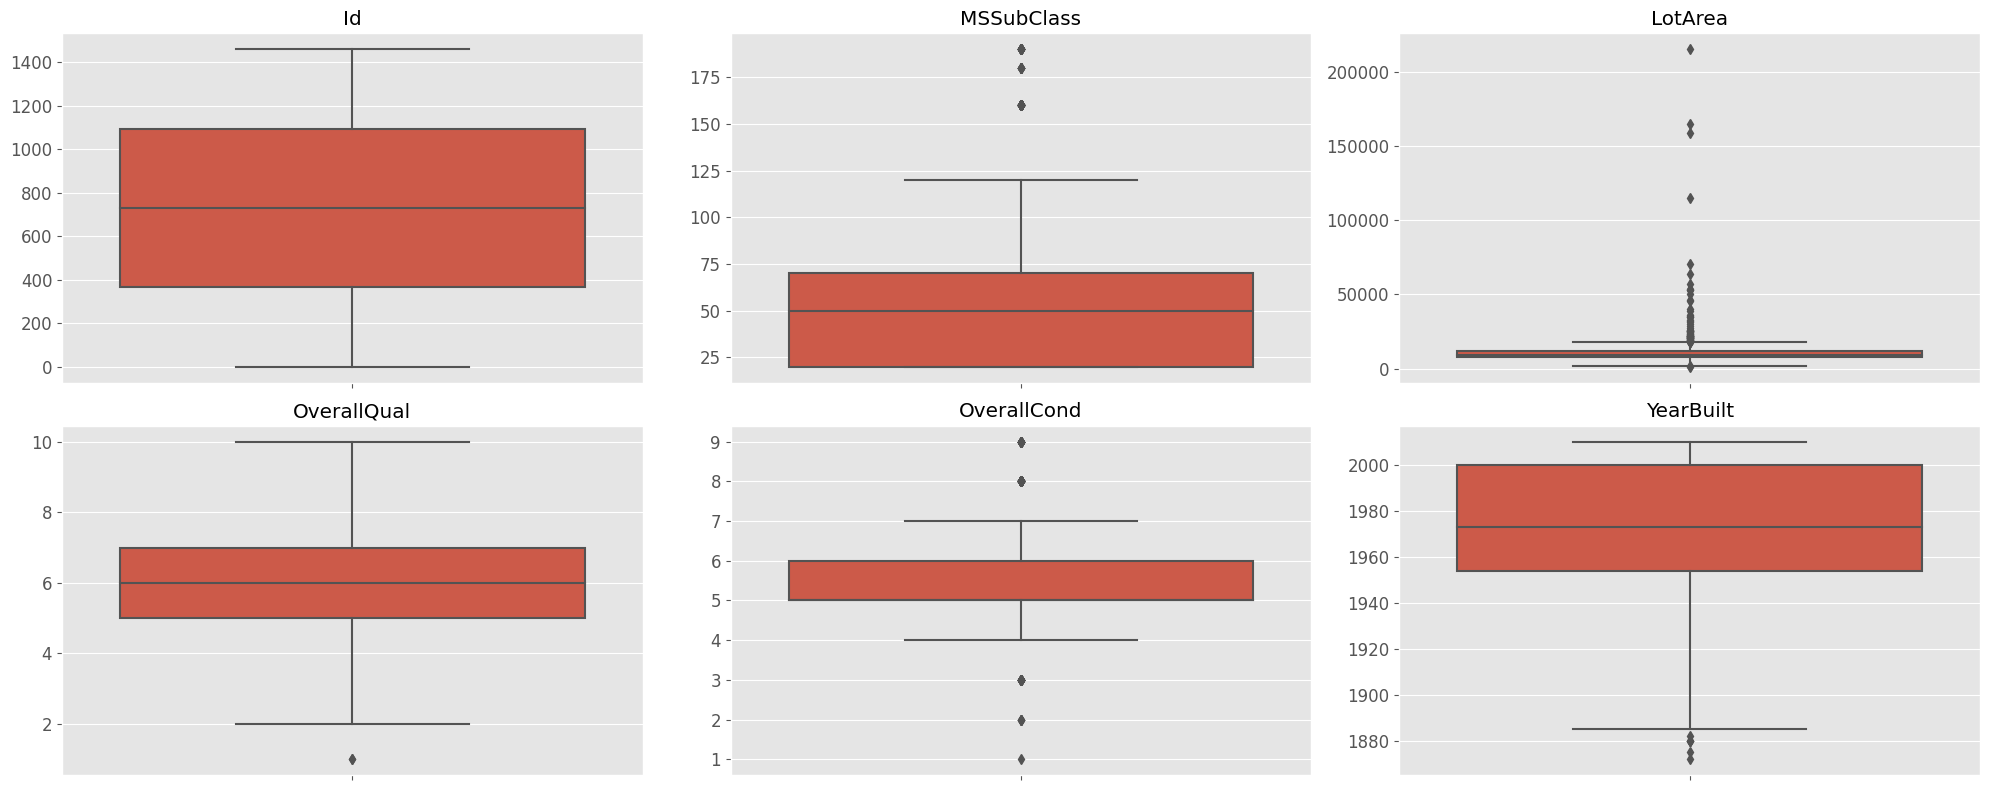

In [15]:
plot_boxplots(data, numeric_cols[:6])

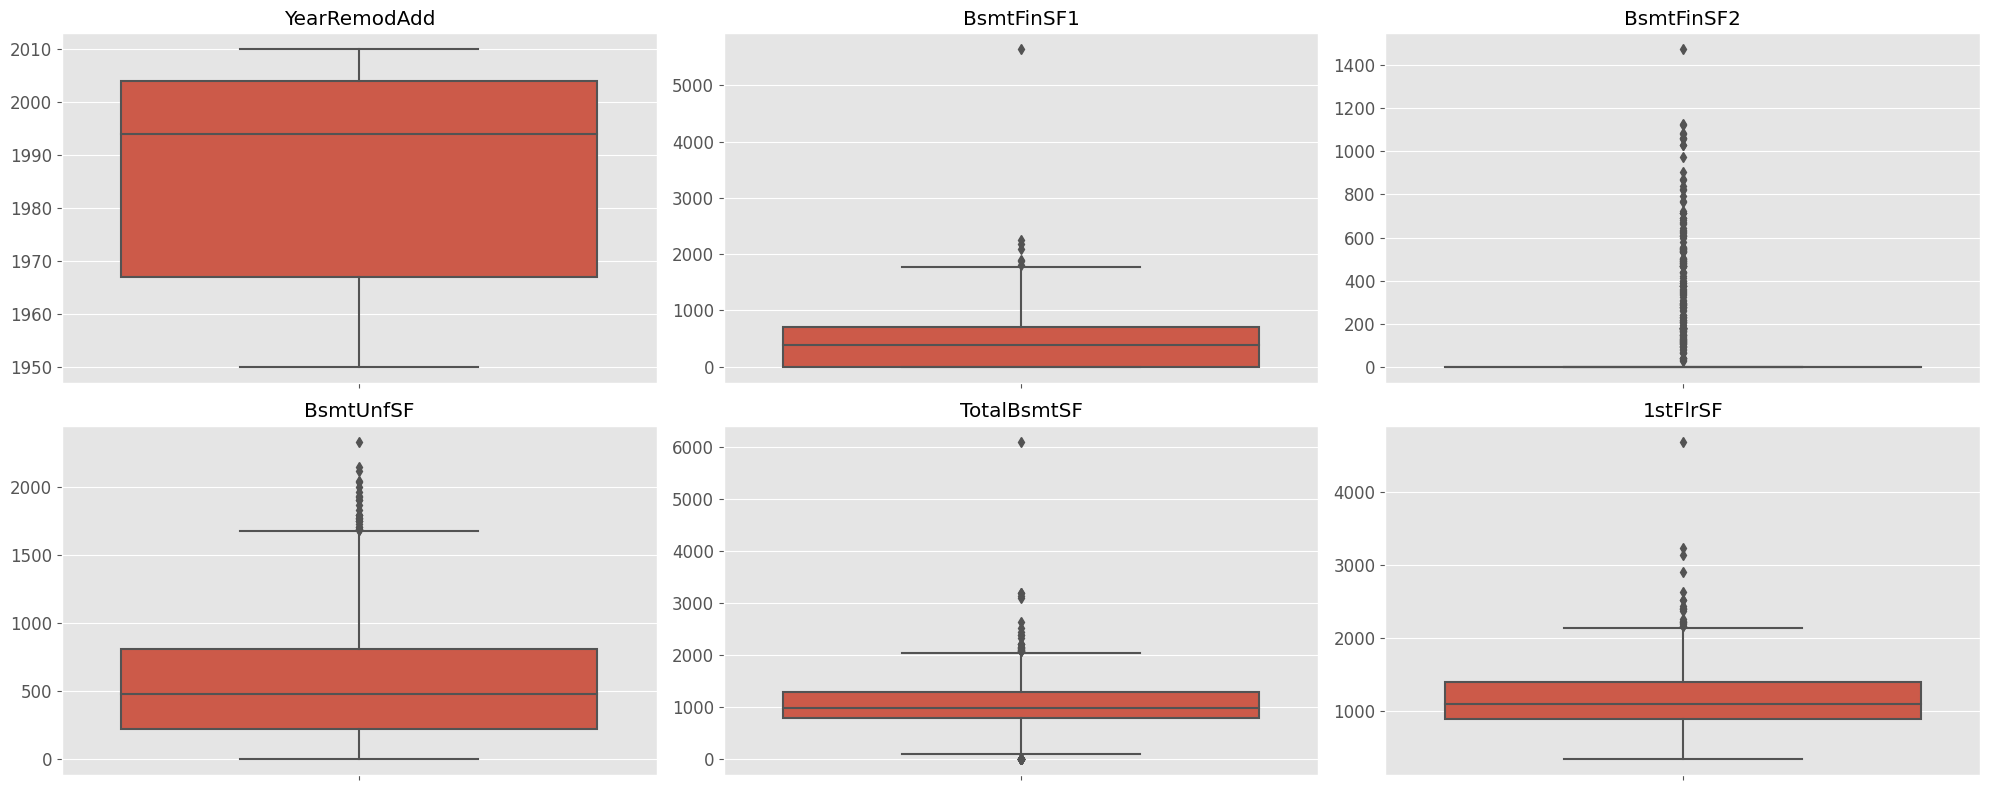

In [16]:
plot_boxplots(data, numeric_cols[6:12])

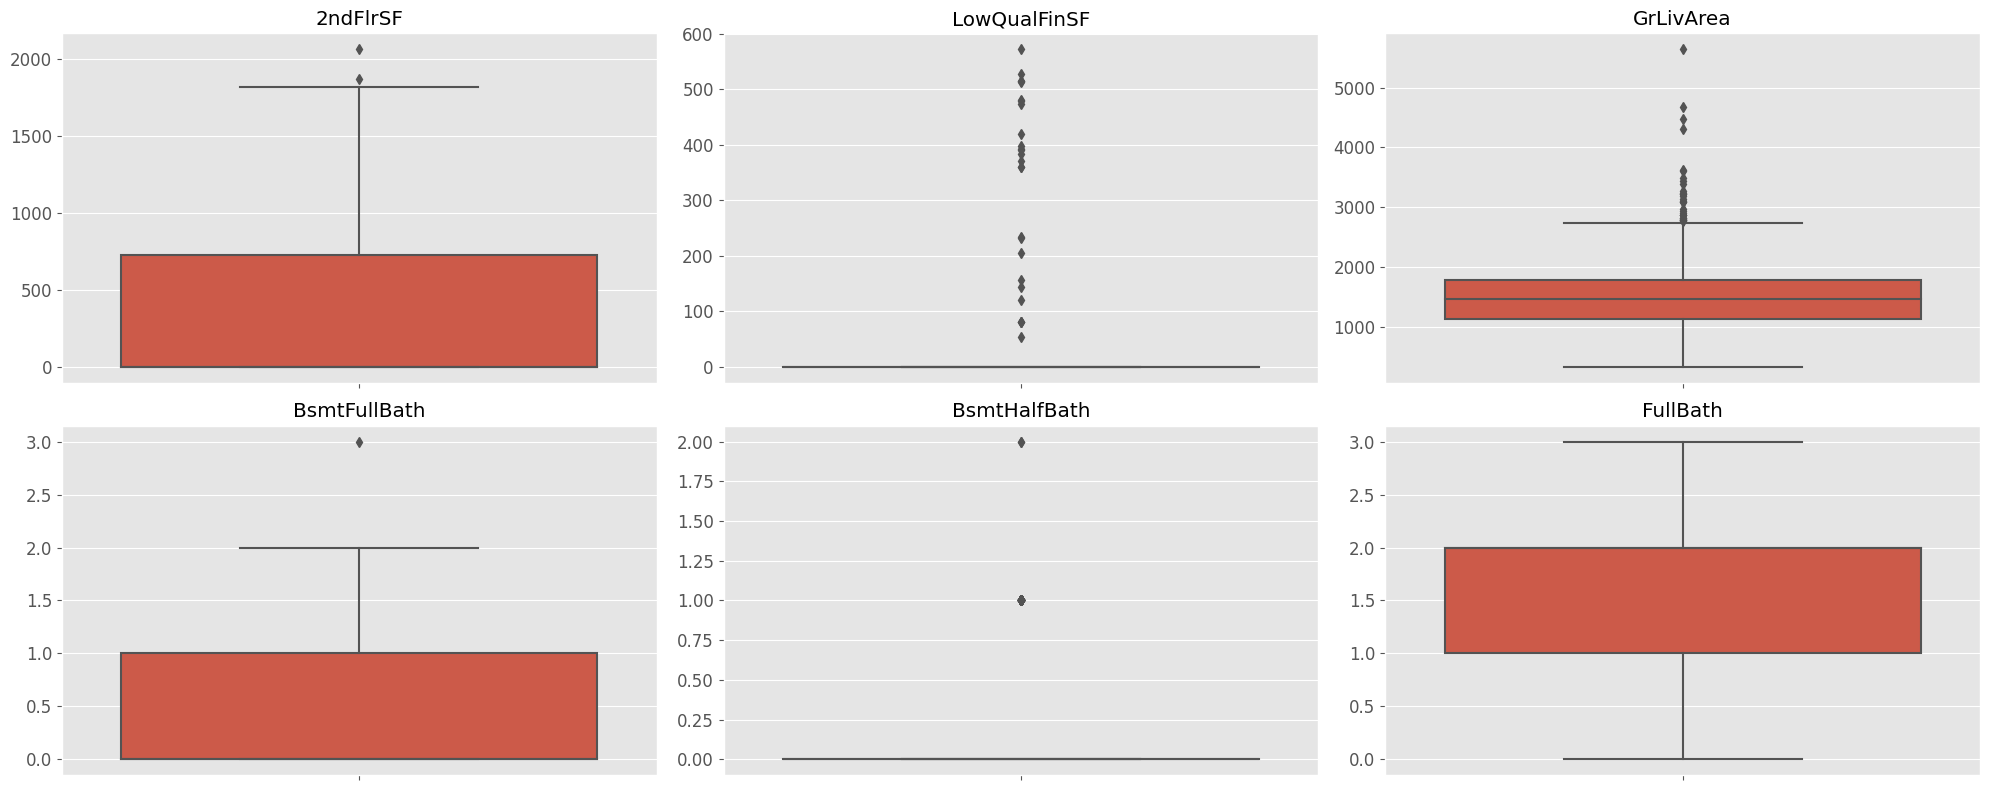

In [17]:
plot_boxplots(data, numeric_cols[12:18])

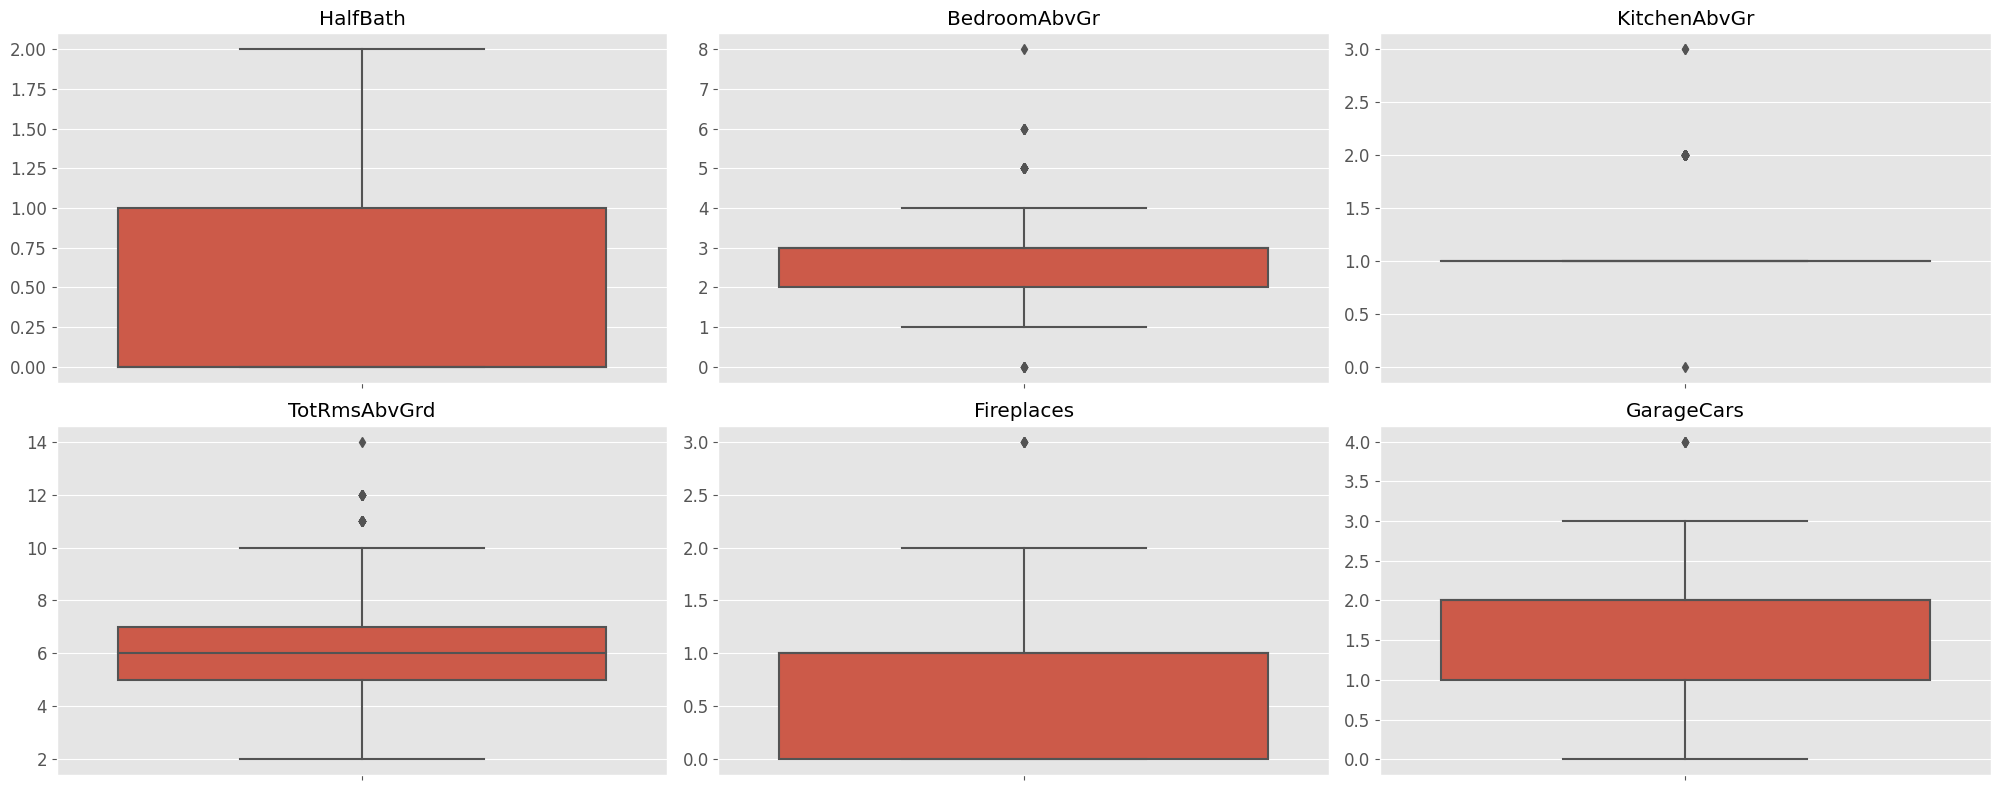

In [18]:
plot_boxplots(data, numeric_cols[18:24])

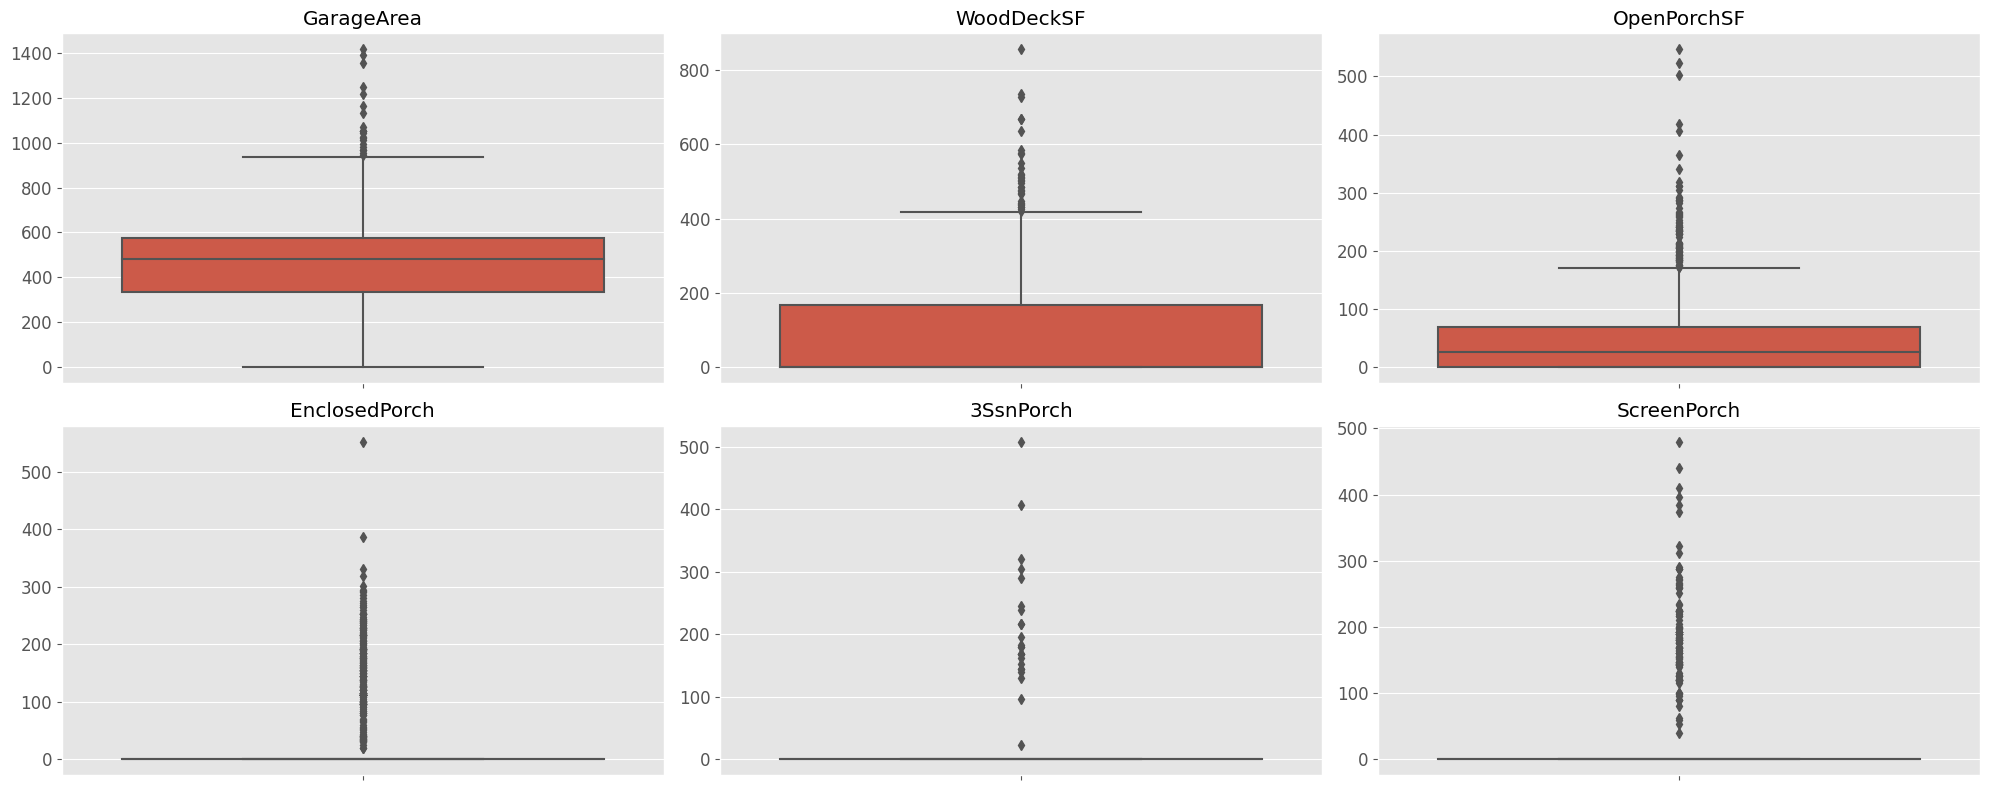

In [19]:
plot_boxplots(data, numeric_cols[24:30])

**Takeaway:**
- Signficant outliers in LotArea, BsmtFinSF2, LowQualFinSF, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch

### Univariate Analysis : Categorical

In [20]:
def UVA_category(data, var_group):
    num_plots = len(var_group)
    num_rows = 2  # Two rows
    num_cols = (num_plots + 1) // num_rows

    # Set the overall figure size
    plt.figure(figsize=(15, 5 * num_rows), dpi=100)

    for j, i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize=True).sort_values(ascending=False)
        n_uni = data[i].nunique()

        # Create a subplot in the grid
        plt.subplot(num_rows, num_cols, j + 1)

        sns.barplot(x=norm_count.index, y=norm_count, order=norm_count.index)
        plt.xlabel('{}'.format(i), fontsize=10)
        plt.ylabel('fraction', fontsize=10)
        plt.xticks(rotation=75)
        plt.title('num_unique = {}\nTop 5 value_counts:\n{}'.format(
            n_uni, norm_count.head(5).to_string()), fontsize = 10)

    plt.tight_layout()

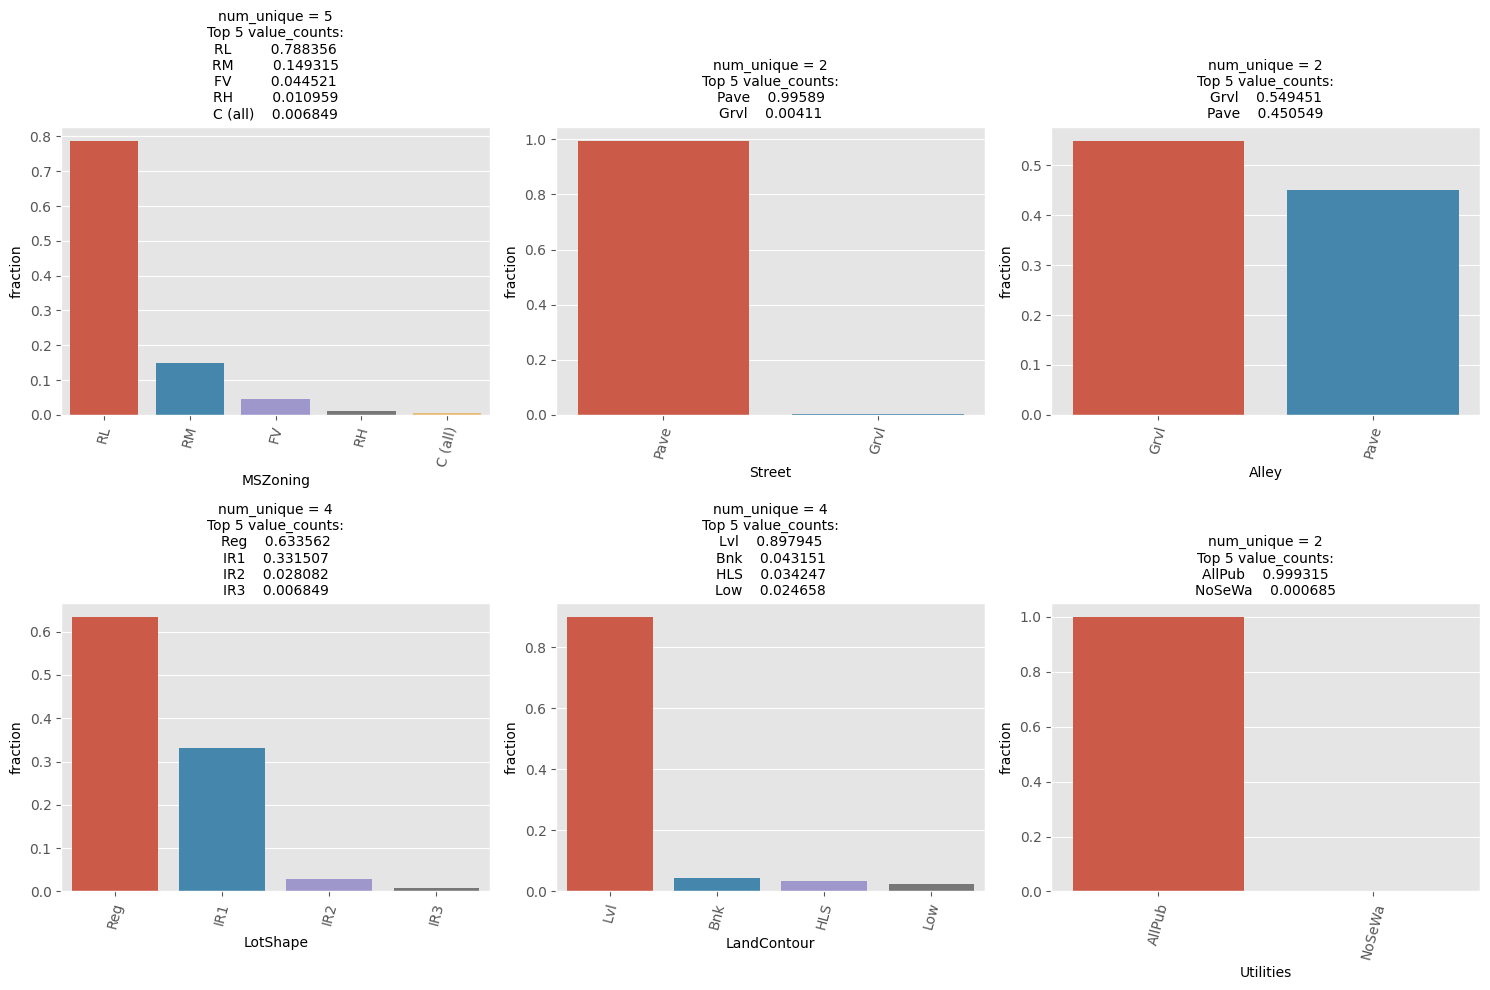

In [21]:
UVA_category(data, category_cols[:6])

- The features Street and Utilities are heavily imbalanced having one category present in more than 99% cases. Therefore, these columns do not offer any meaningful information, and thus can be dropped. We will choose to drop more features if we see any category present in more than 99% cases.

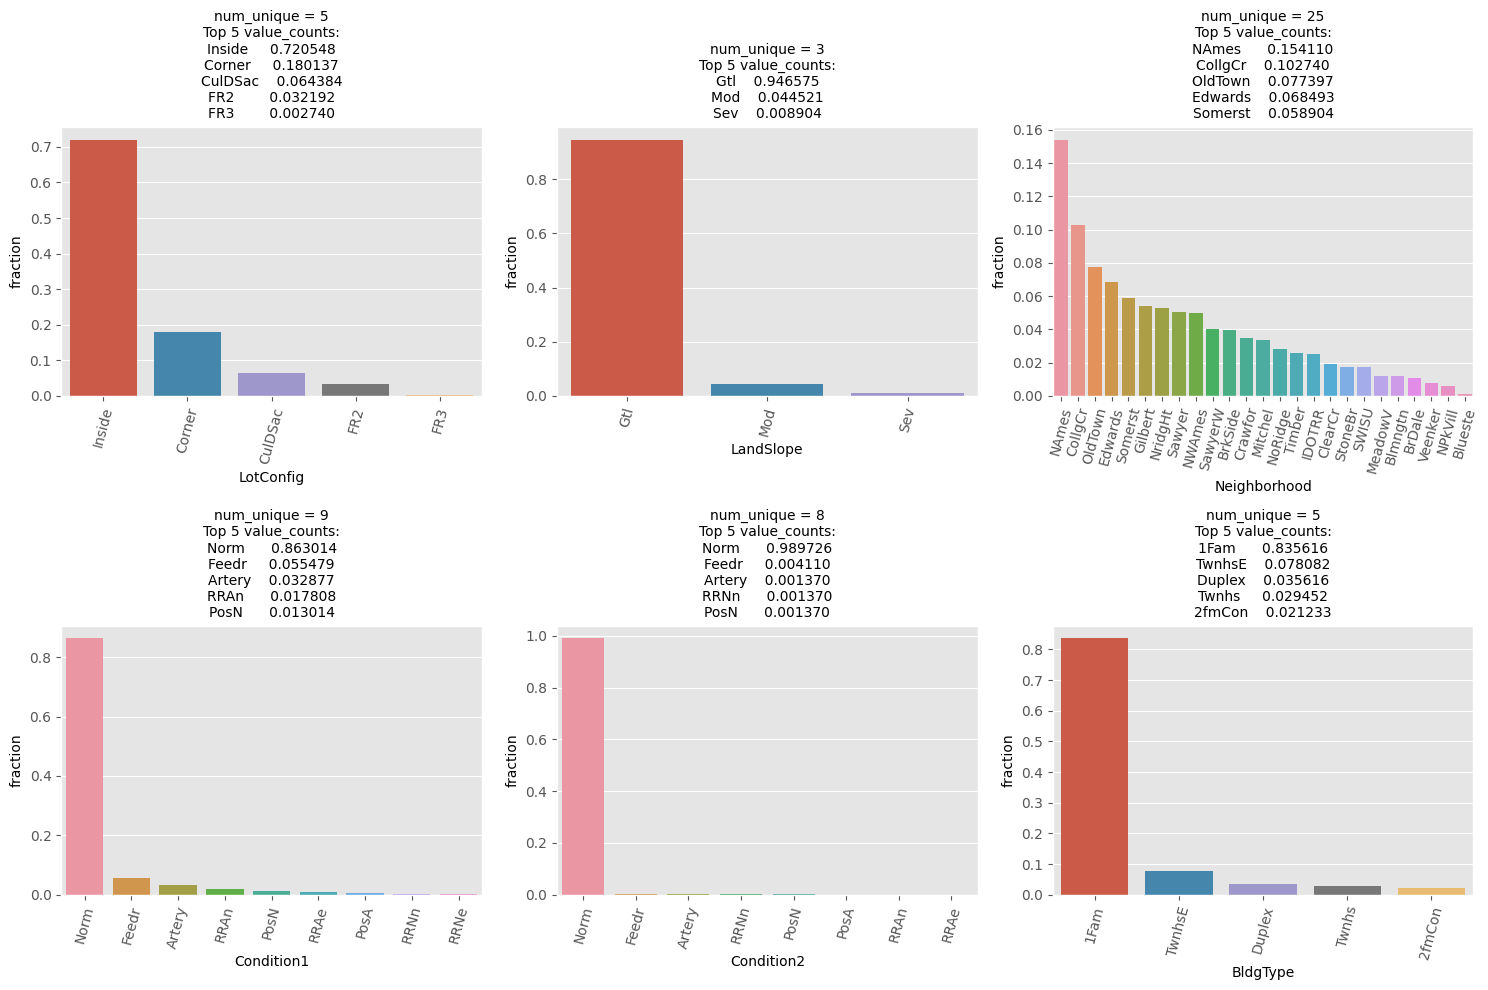

In [22]:
UVA_category(data, category_cols[6:12])

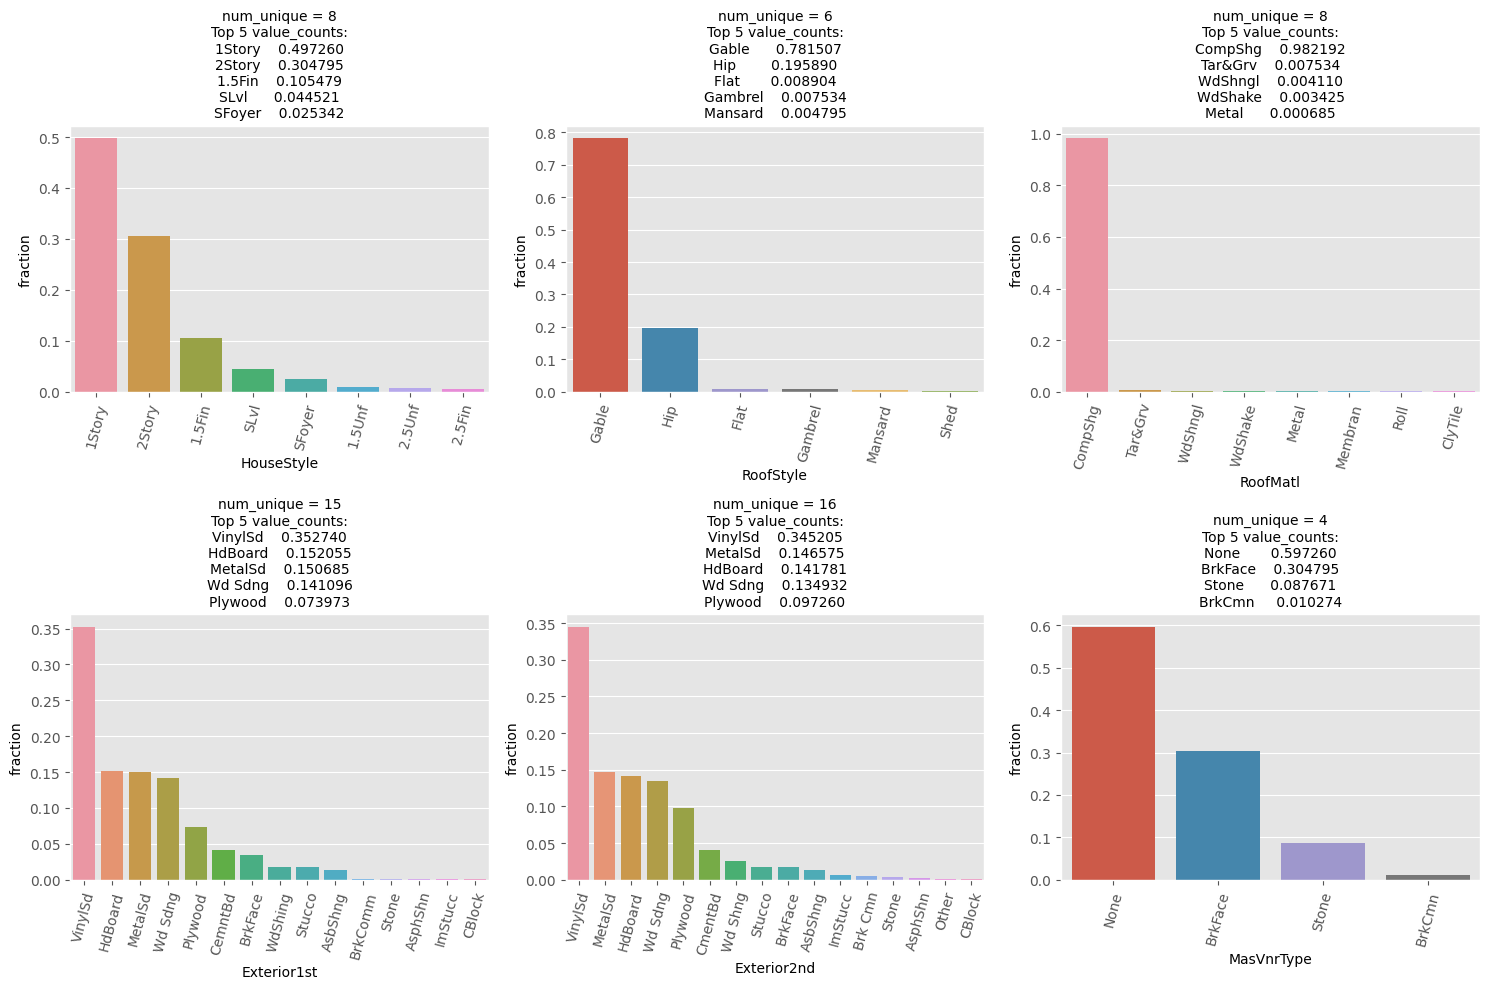

In [23]:
UVA_category(data, category_cols[12:18])

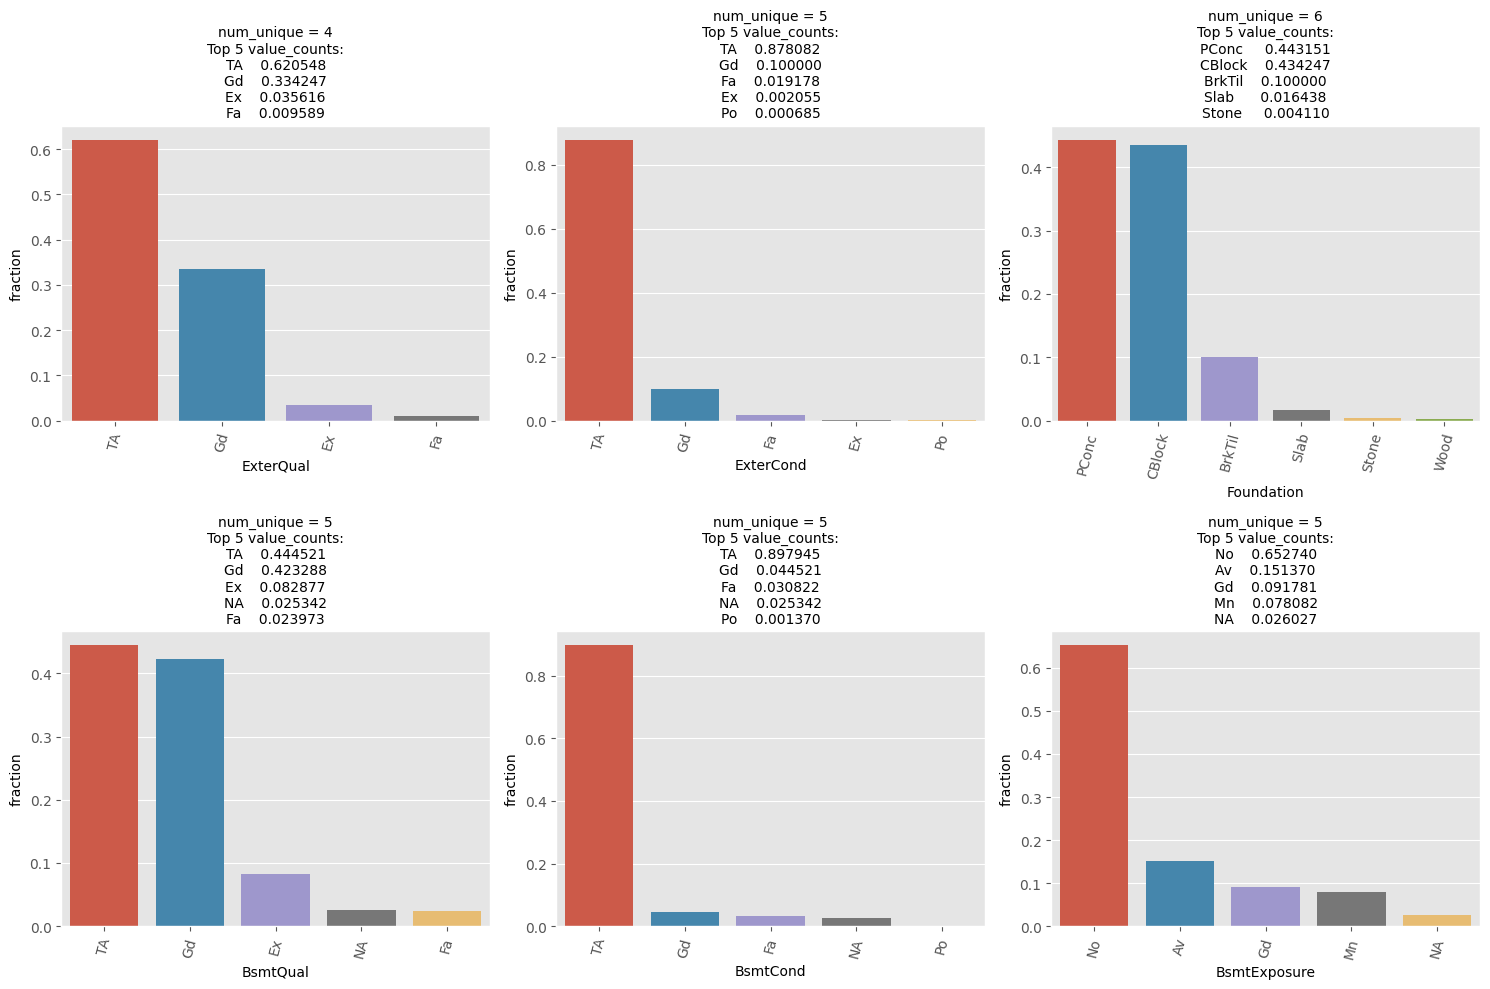

In [24]:
UVA_category(data, category_cols[18:24])

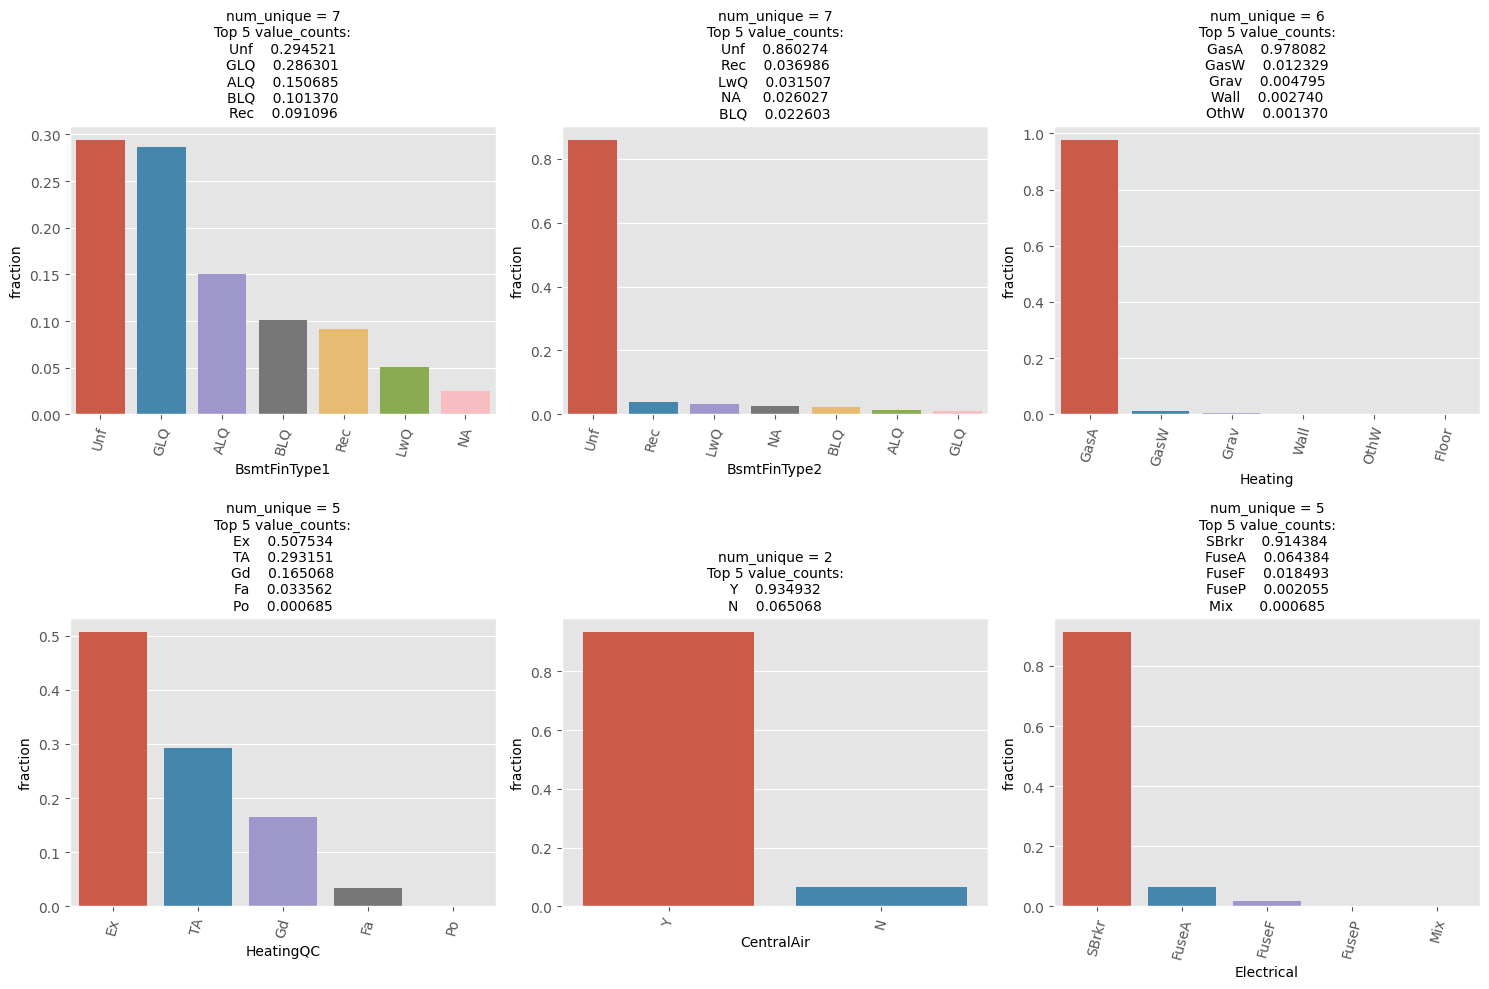

In [25]:
UVA_category(data, category_cols[24:30])

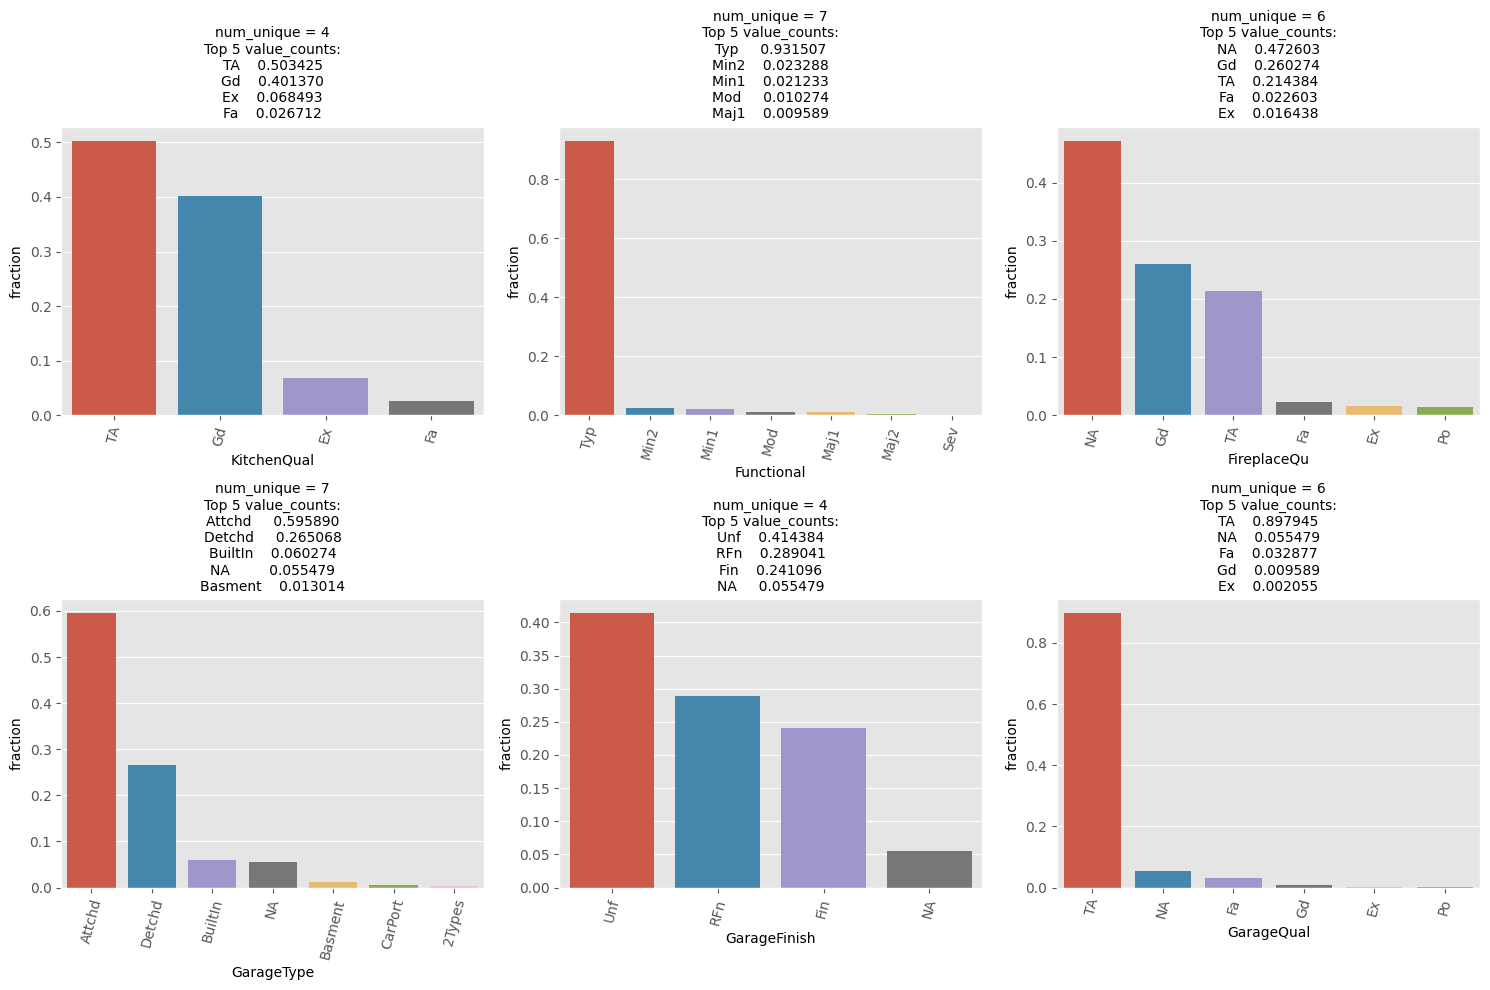

In [26]:
UVA_category(data, category_cols[30:36])

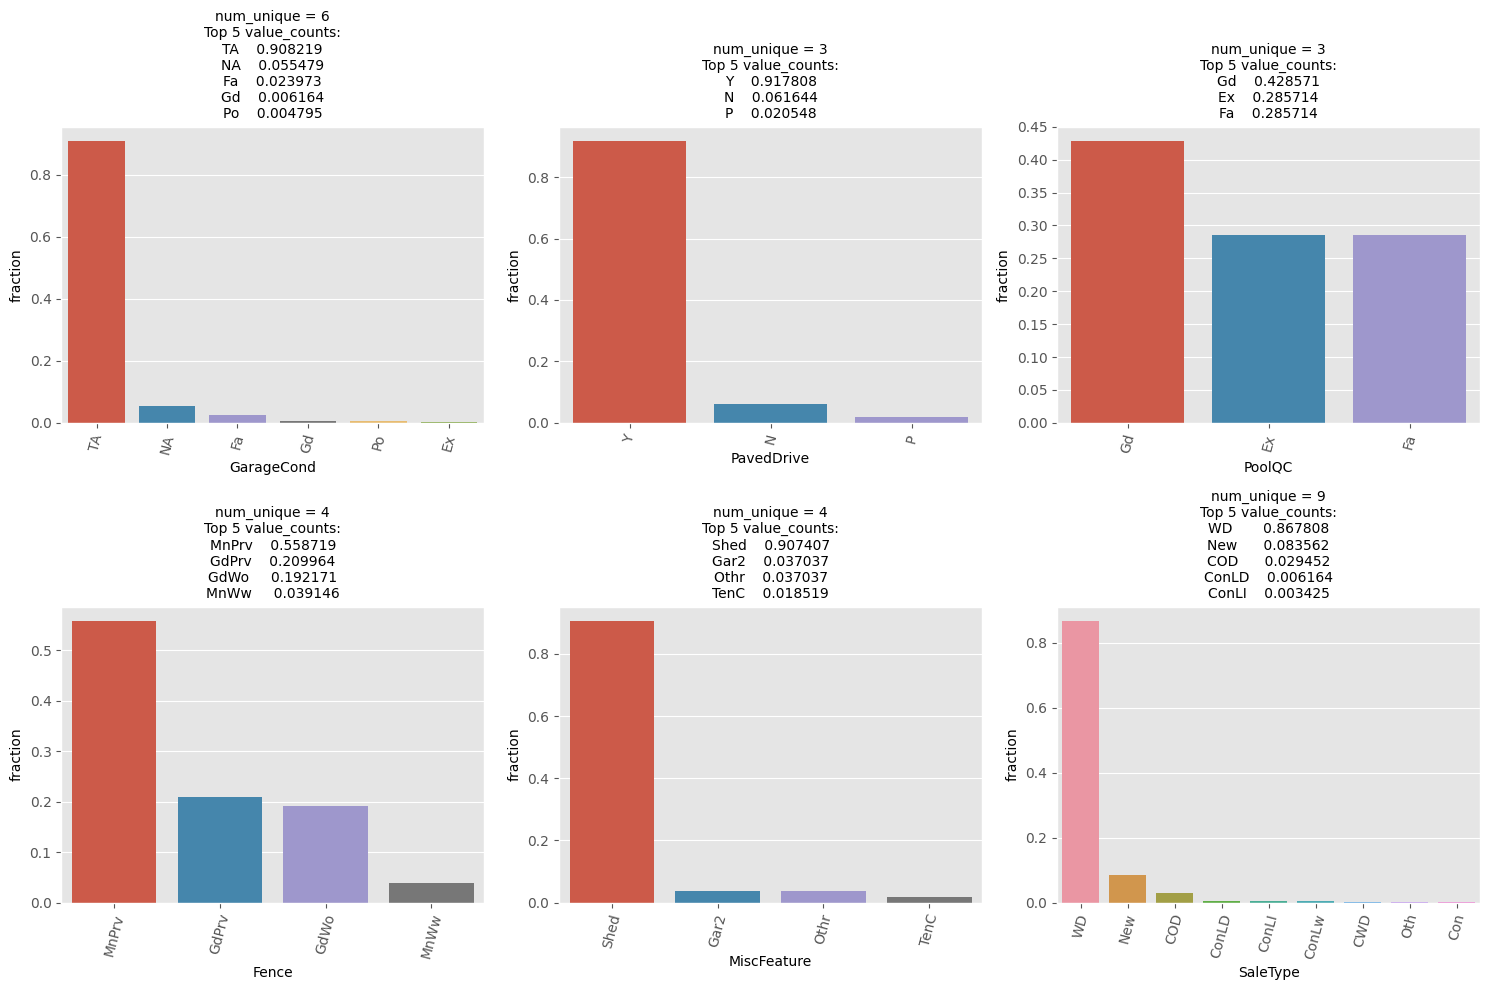

In [27]:
UVA_category(data, category_cols[36:42])

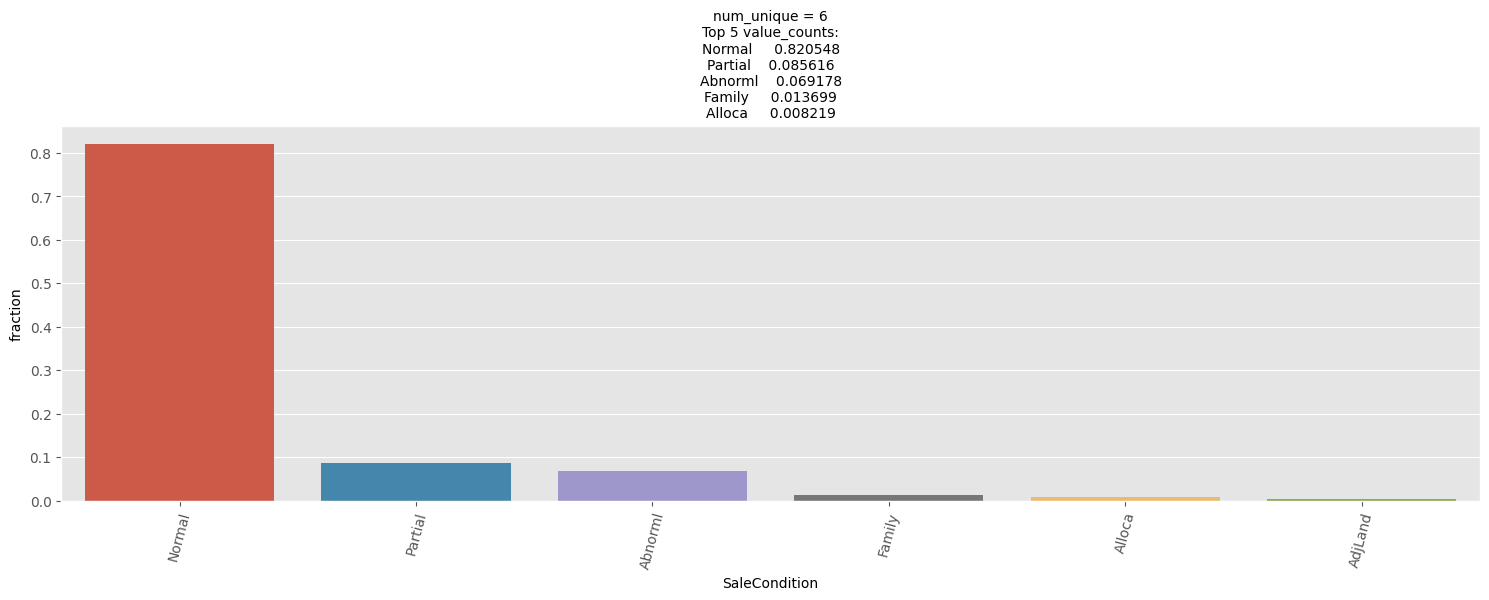

In [28]:
UVA_category(data, category_cols[42:])

The univariate analysis of the categorical values have revealed the significant imbalance in most of the features where one or two categories in a feature are present in a much higher ratio than others. This could present a picture of the most typical features of the homes in the dataset.

### Bivariate Analysis: Categorical - Numerical (Target : Sale Price)

Since a lot of combinations are possible in Bivariate Analysis: Categorical - Numerical, we will focus on the SalePrice(target) as a numerical feature only for this Bivariate Analysis.

In [29]:
def BVA_cat_num(data, cat, num):
    
    size = len(cat)
    plt.figure(figsize = (20,15), dpi = 100)
    
    #Looping over the categorical columns
    for j,i in enumerate(cat):
        plt.subplot(3,3,j+1)
        
        #Sorting the data
        sorted_data = data.groupby(i)[num].median().sort_values(ascending=False)
        sns.barplot(x=sorted_data.index, y=sorted_data.values, estimator=np.mean, order =sorted_data.index)
        plt.xticks(rotation=75, fontsize=15)
        plt.yticks(fontsize=15)
        plt.title(f'{num} vs {i}', fontsize = 15)
        plt.xlabel('')
        
    plt.tight_layout()
    plt.show()

In [30]:
target_col = ['SalePrice']

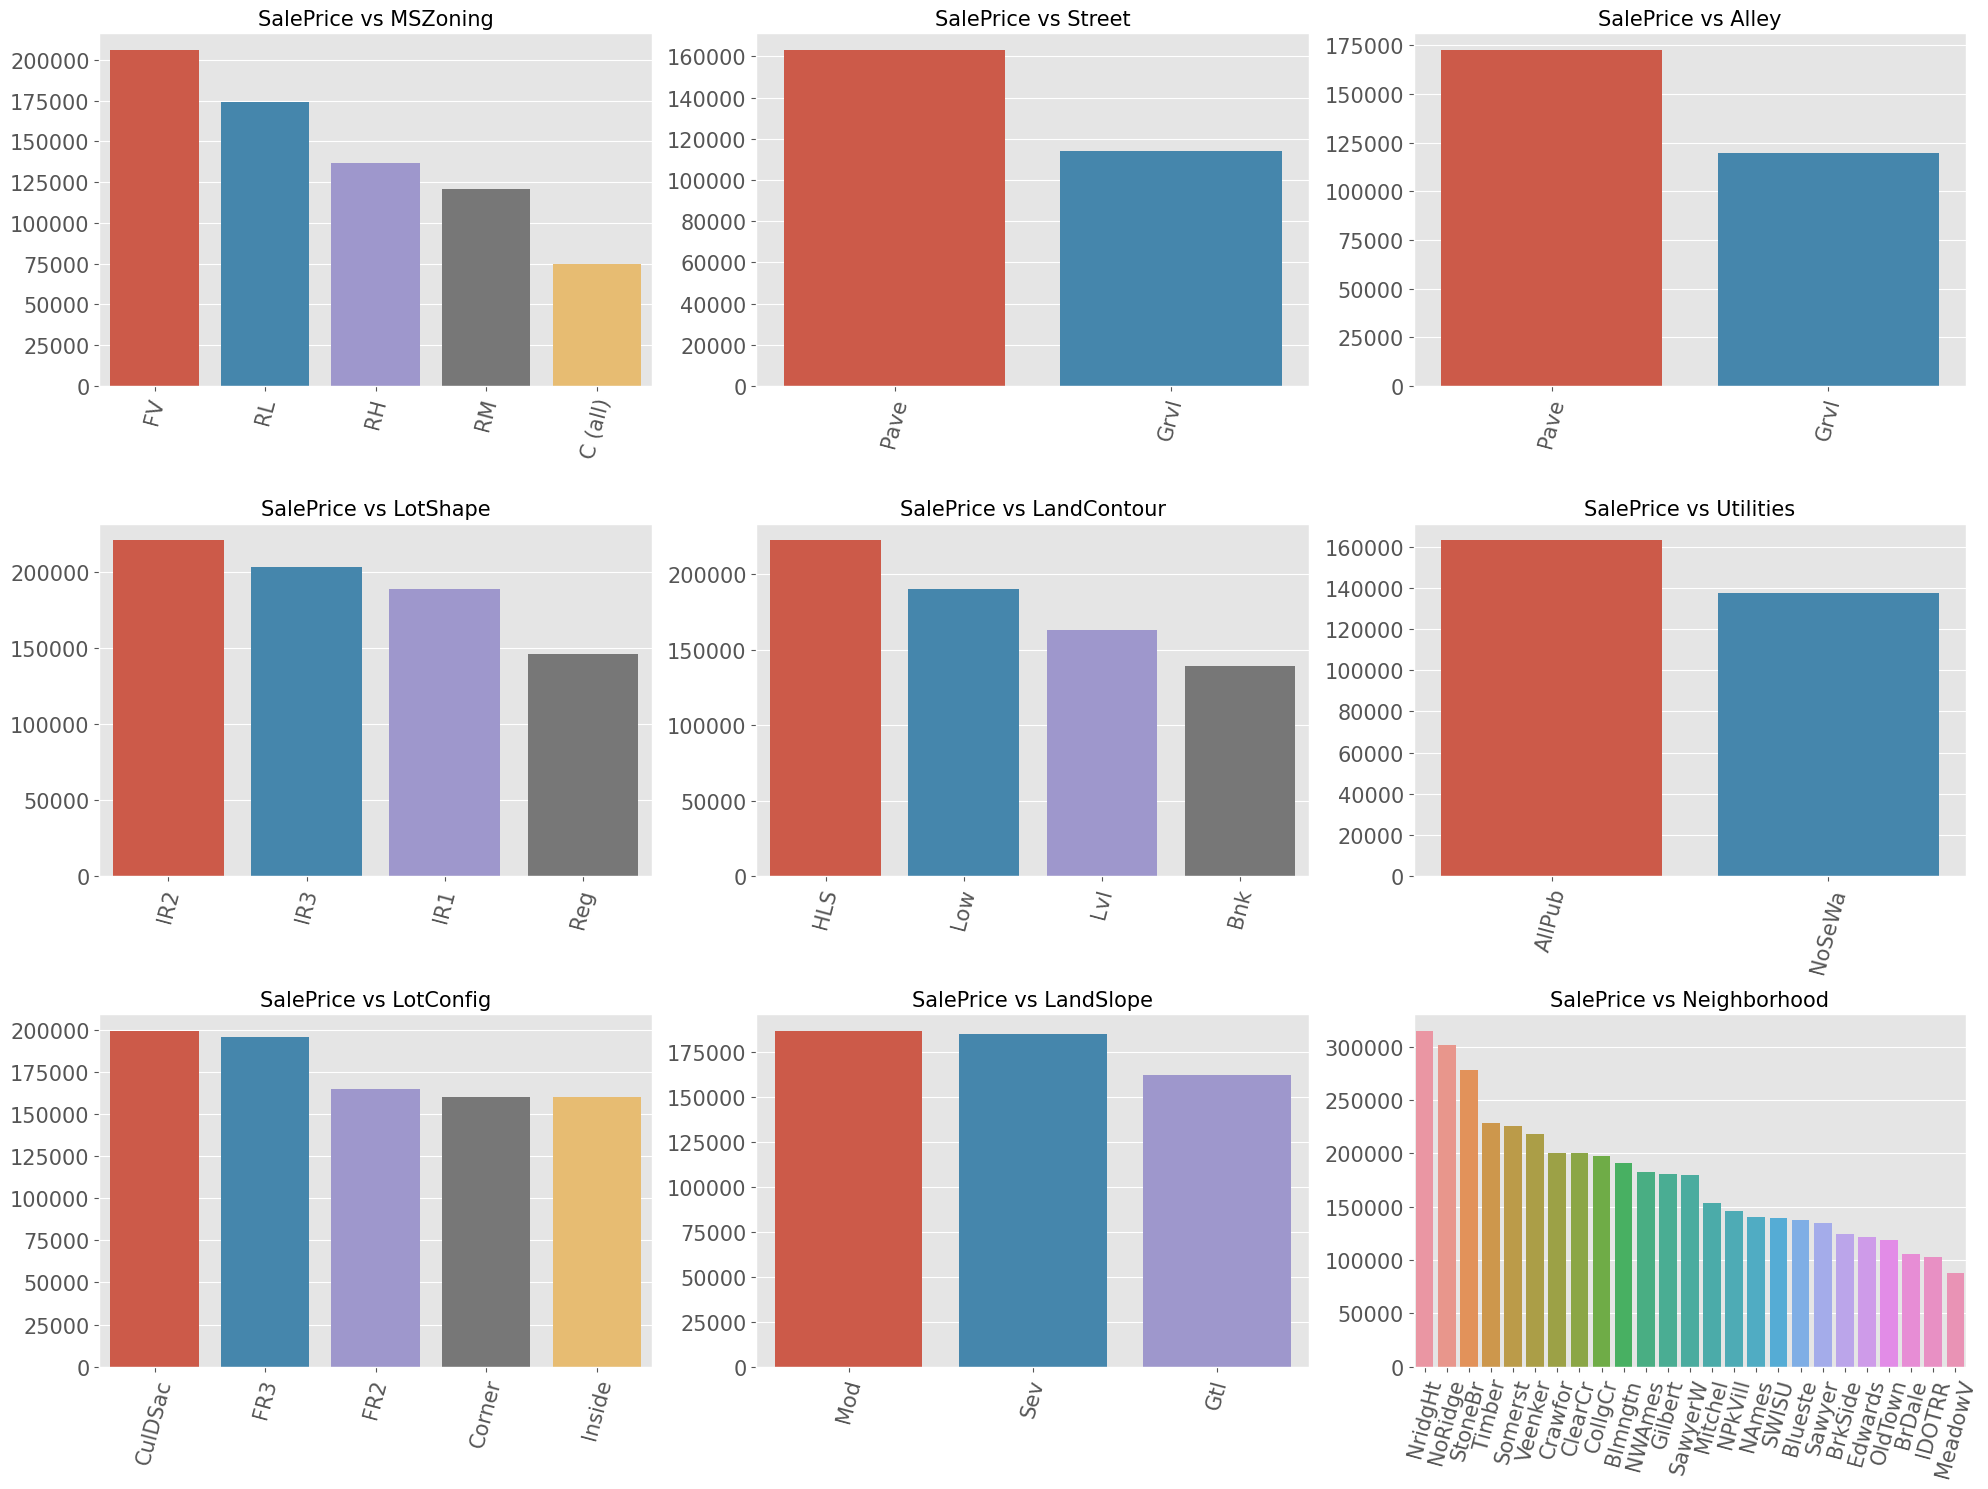

In [31]:
BVA_cat_num(data, category_cols[:9], 'SalePrice')

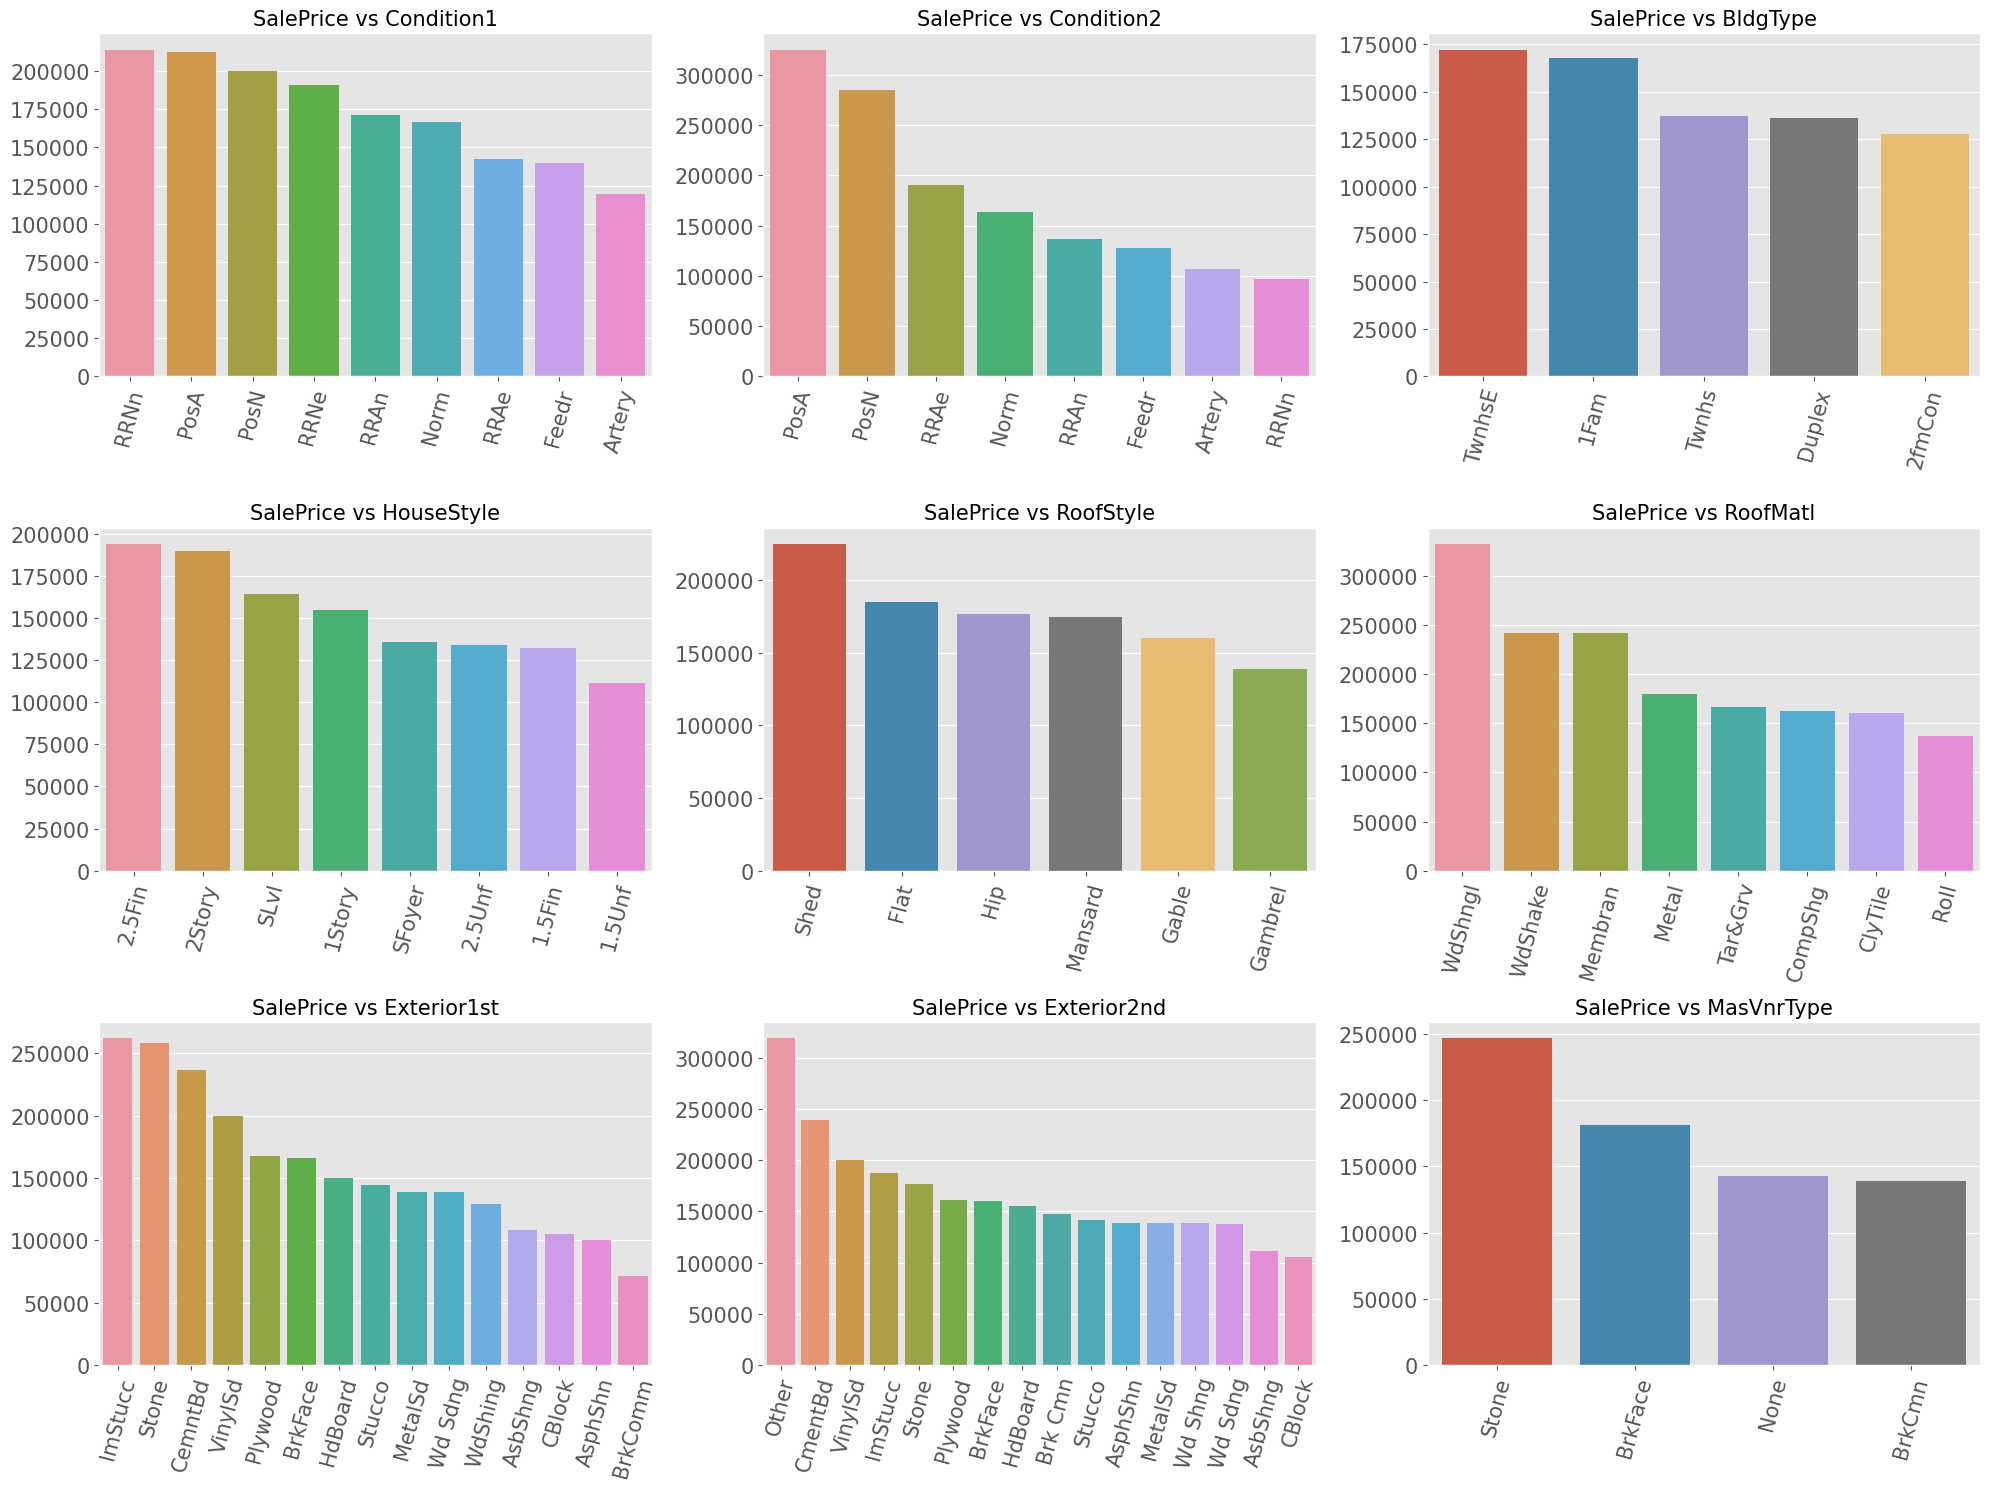

In [32]:
BVA_cat_num(data, category_cols[9:18], 'SalePrice')

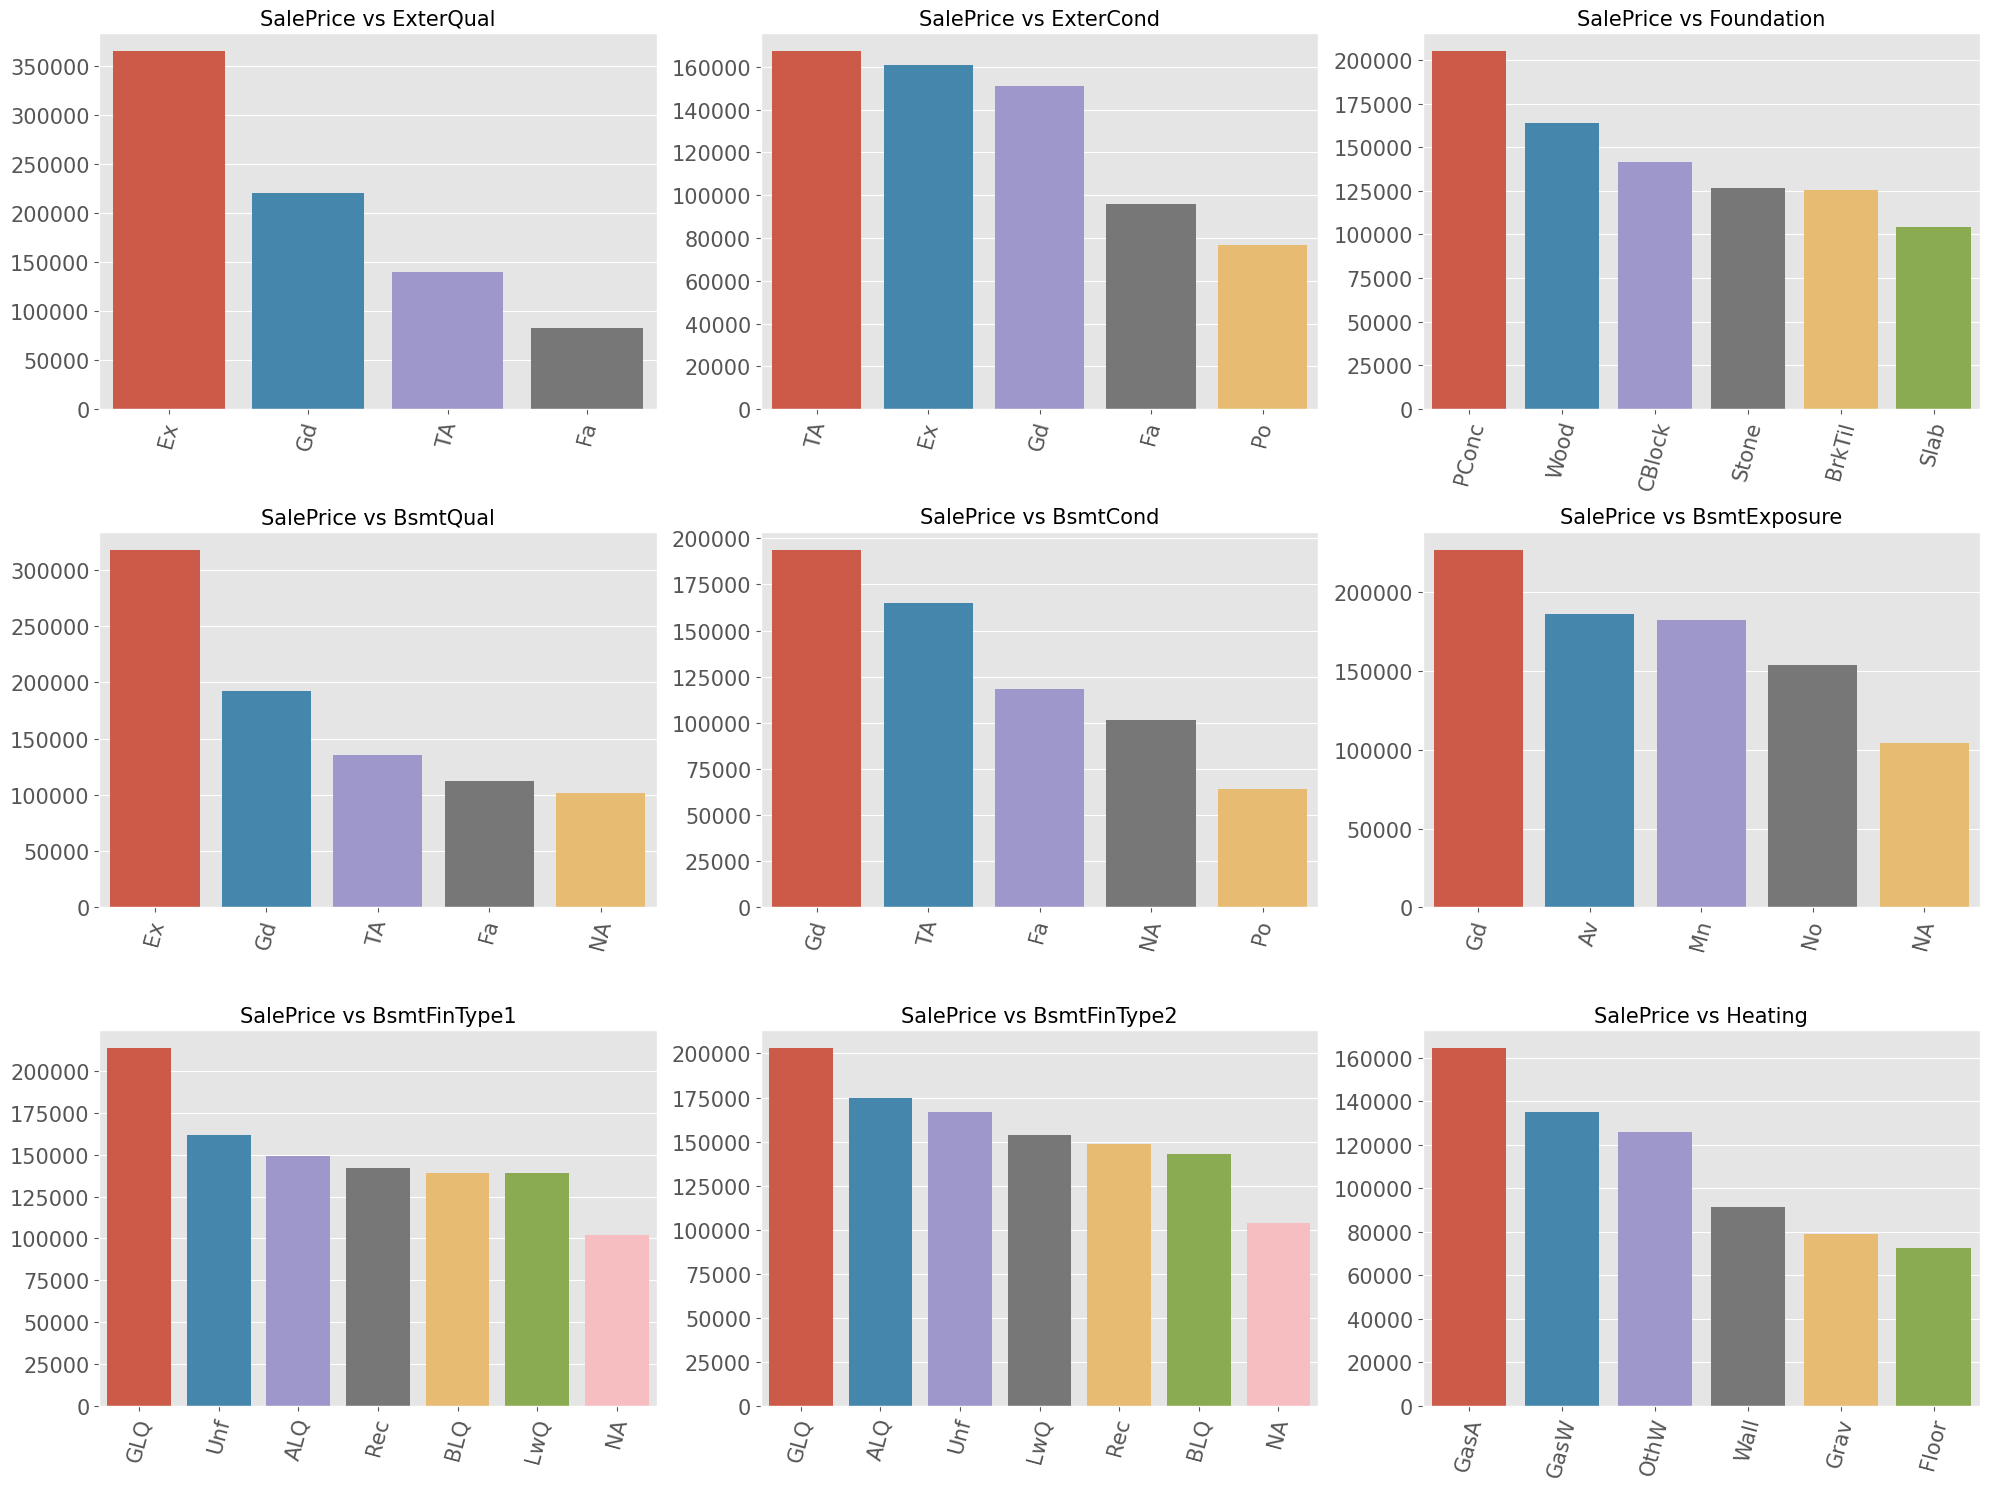

In [33]:
BVA_cat_num(data, category_cols[18:27], 'SalePrice')

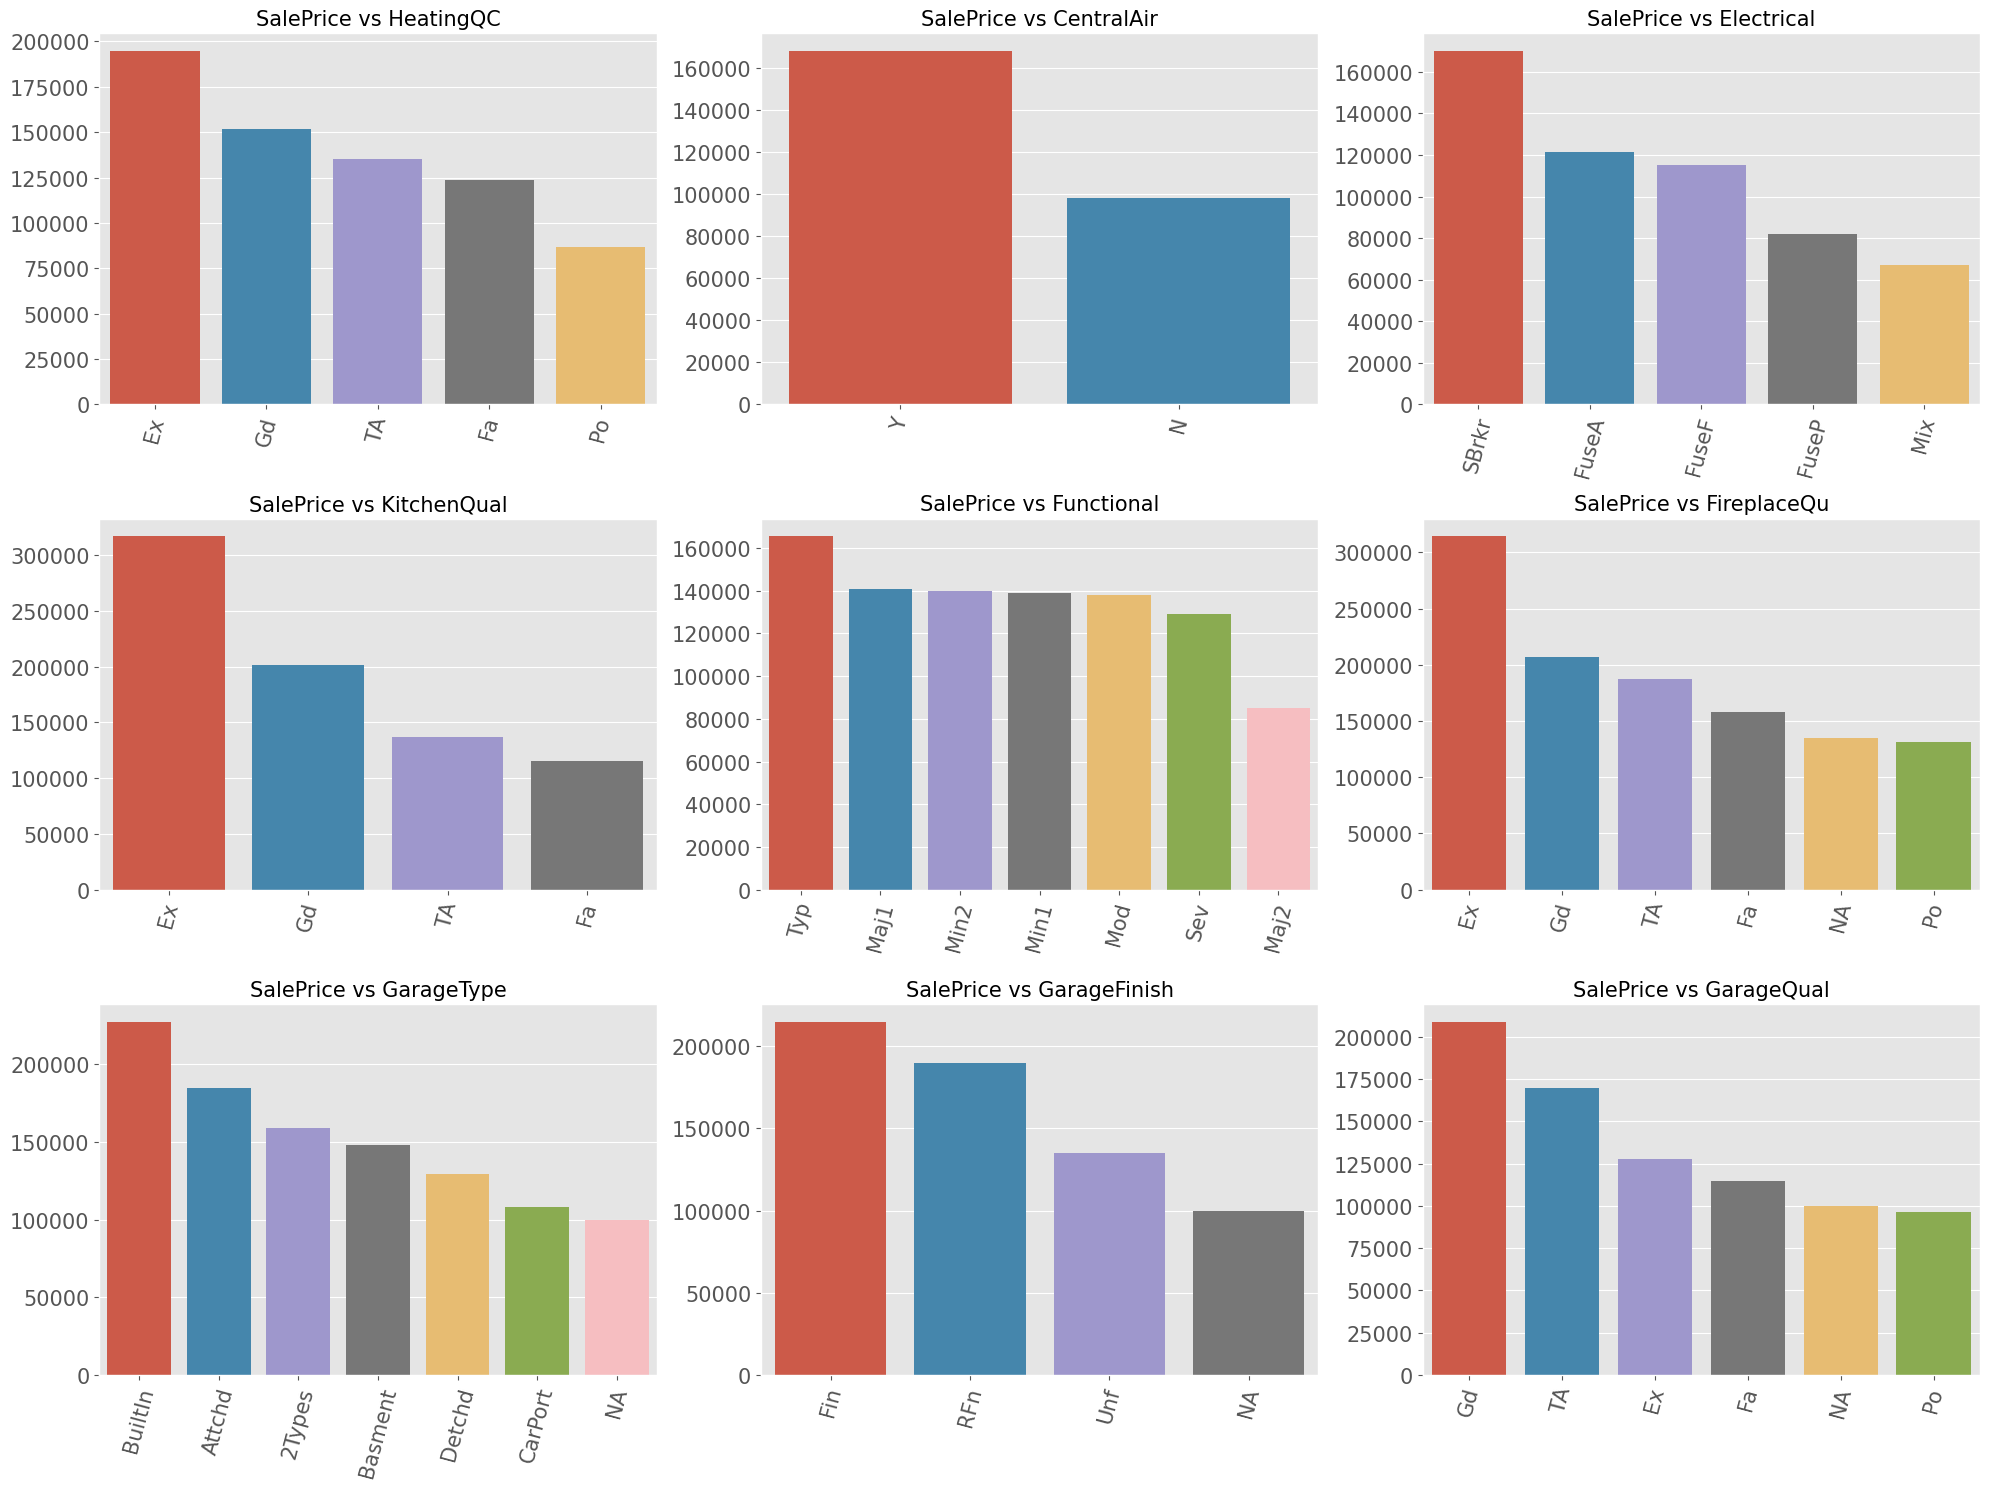

In [34]:
BVA_cat_num(data, category_cols[27:36], 'SalePrice')

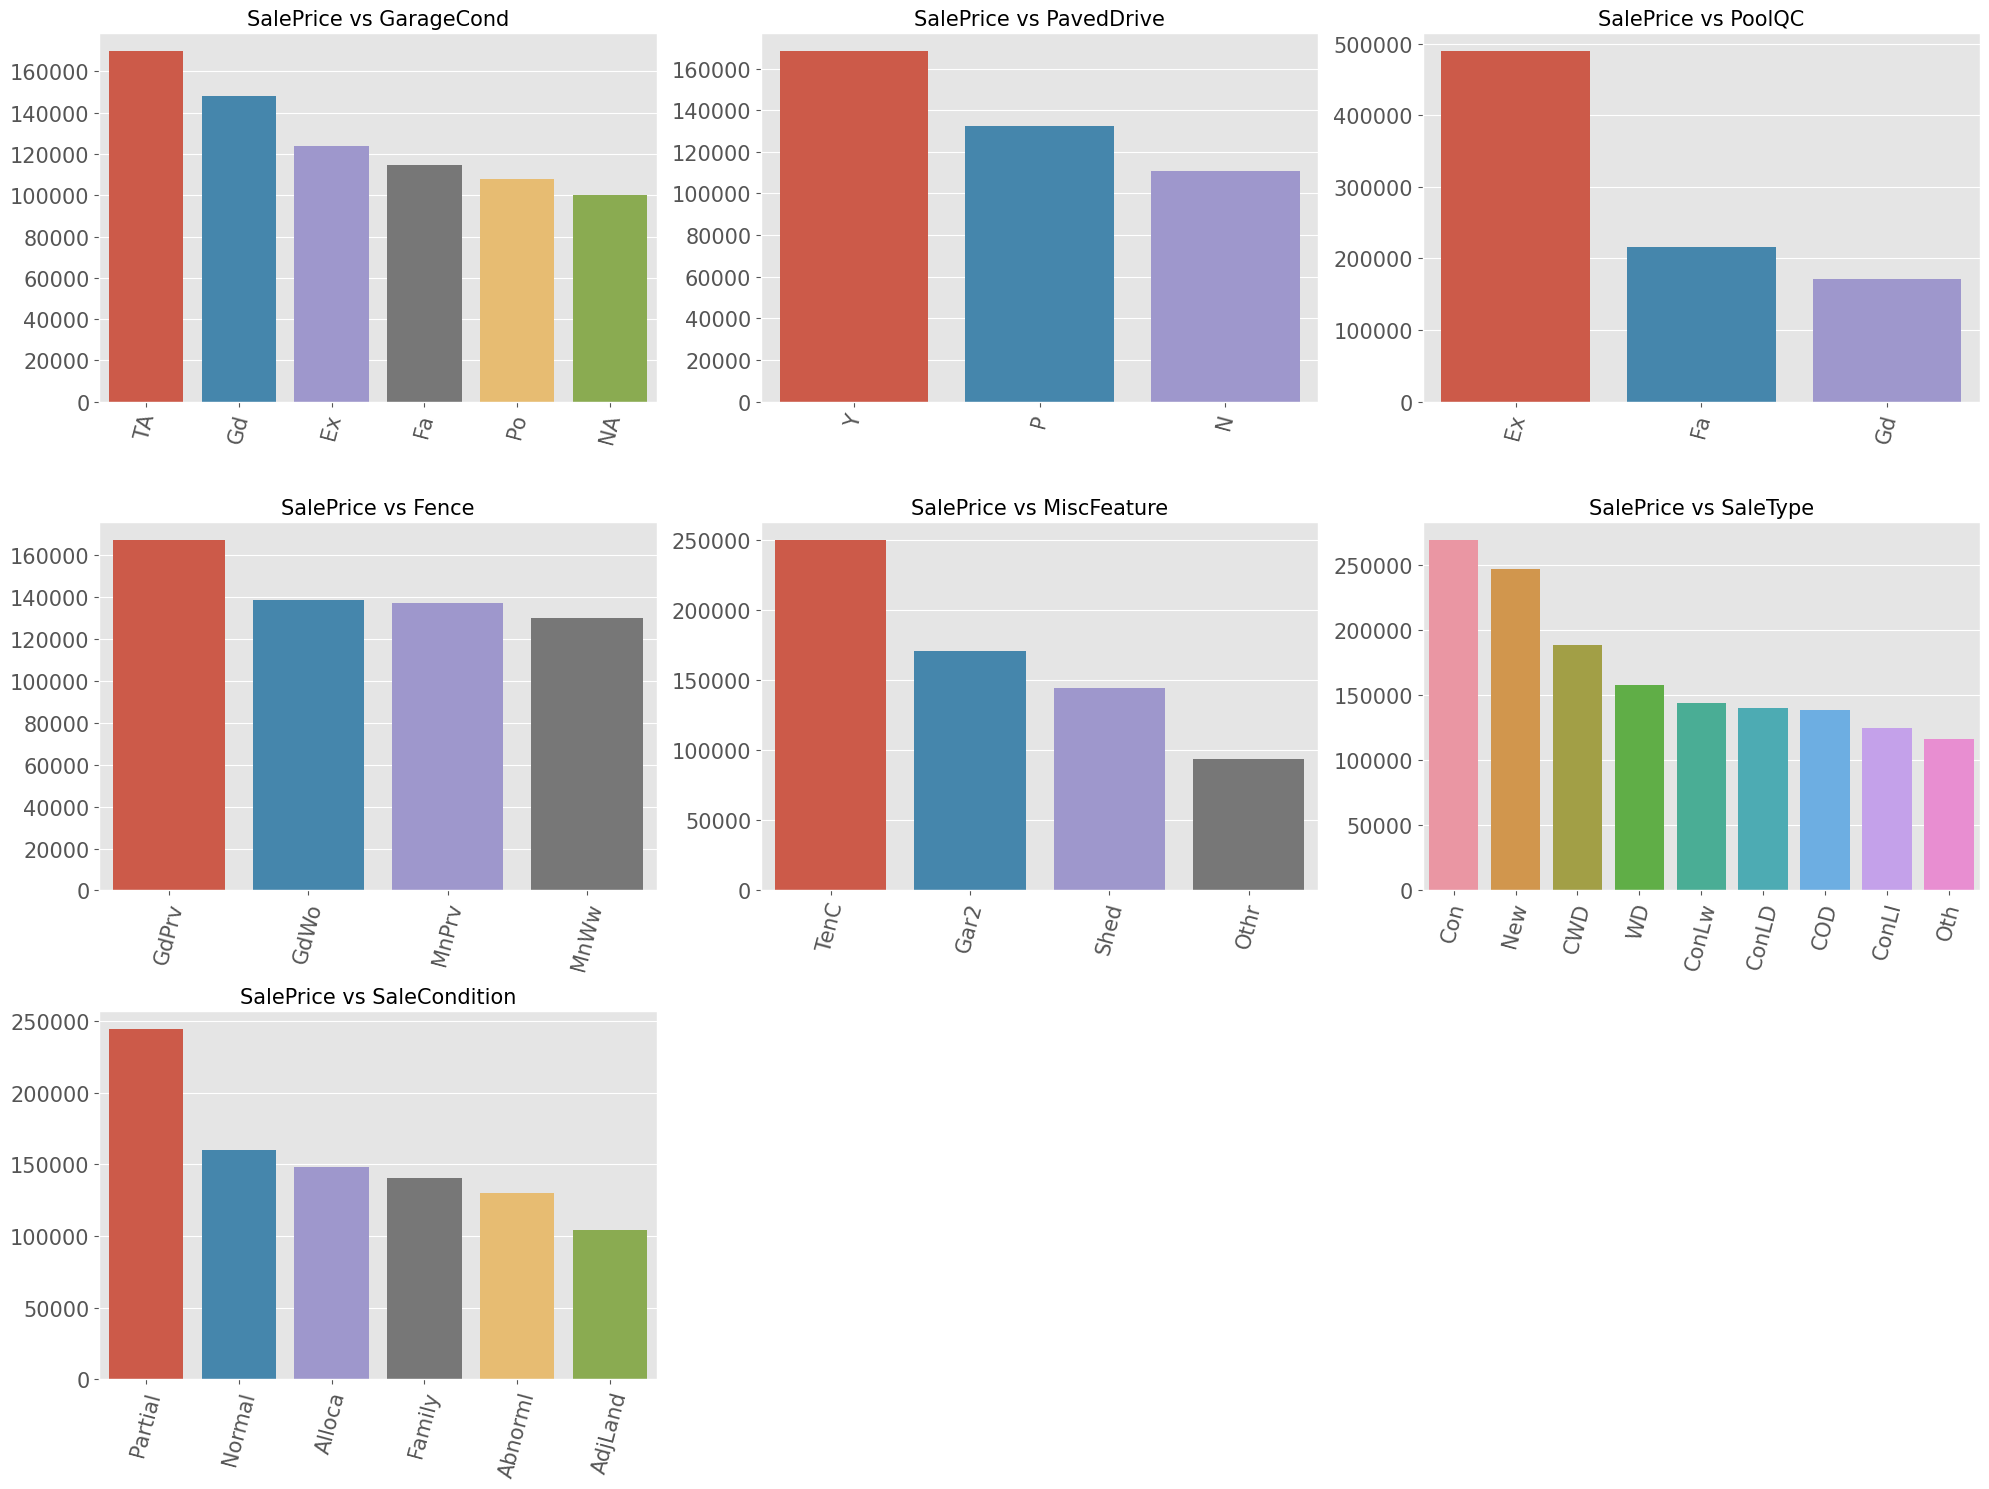

In [35]:
 BVA_cat_num(data, category_cols[36:], 'SalePrice')

Some key takeaways:
SalePrice is significantly higher for homes where:
- SaleCondition is Partial.
- Alley is Paved.
- ExterQual is Ex (Excellent).
- CentralAir is Y (Yes).
- MiscFeature is TenC (Tennis Court).
- PoolQC is Ex (Excellent).
- FireplaceQual is Ex (Excellent).
- KitchenQual is Ex (Excellent).

In [36]:
data.drop(columns = cols_to_drop, axis = 1, inplace = True)

<Figure size 4500x1500 with 0 Axes>

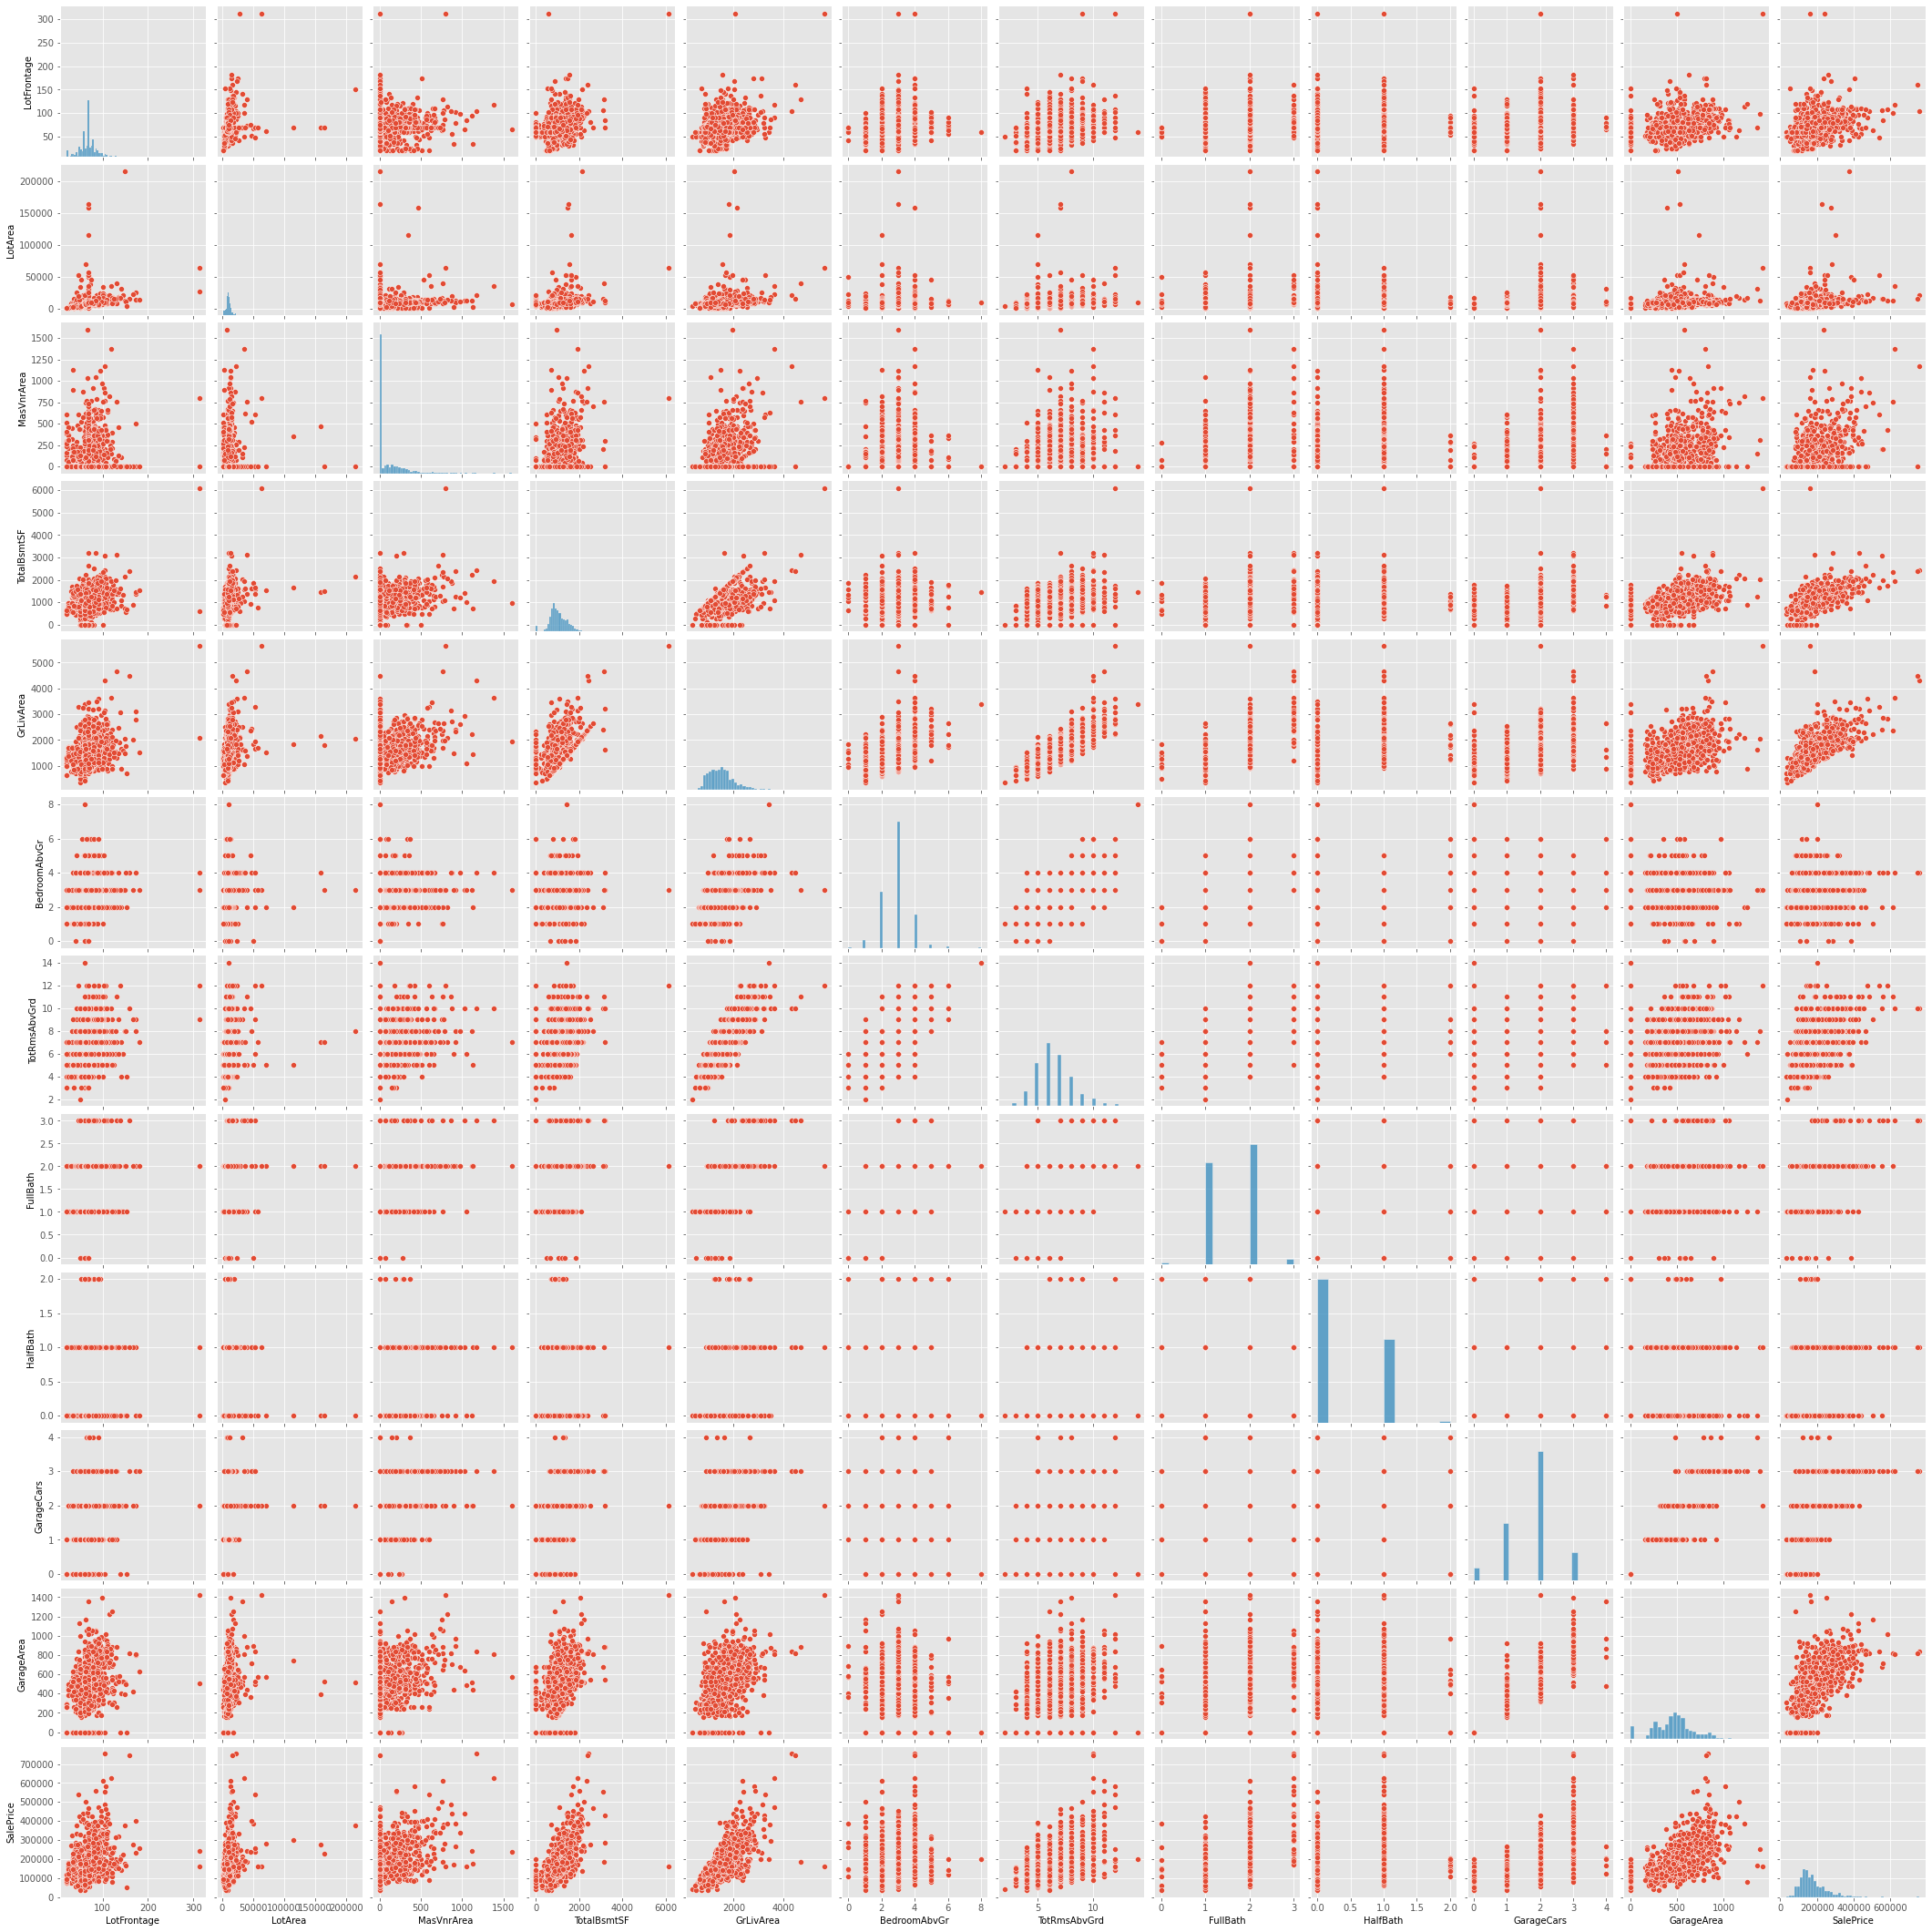

In [37]:
cols_for_pairplot = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'BsmtFinType1',
                    'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'FullBath', 'HalfBath',
                    'GarageCars', 'GarageArea', 'SalePrice']

plt.figure(figsize = (30,10), dpi = 150)
sns.pairplot(data[cols_for_pairplot])
plt.show()

Takeaways:
- Features such as GrLivArea, TotalBsmtSF show a fairly Linear relationship with the target (SalePrice).

### Feature Engineering

Creating features:
- YearsSinceBuilt as Age of Property in Years when it was Sold.
- YearsSinceRemod as Years passed since the property was remodelled.
- YearsSinceGarageBuilt as the Years passed since the Garage was built.

In [38]:
#Feature Engineering
data['YearsSinceBuilt'] = data['YrSold'] - data['YearBuilt']
data['YearsSinceRemod'] = data['YrSold'] - data['YearRemodAdd']
data['YearsSinceGarageBuilt'] = data['YrSold'] - data['GarageYrBlt']

- Many columns in the data contain ranked information, we will convert them to ordinal features as specified in the rank_map.
These columns are **ExterCond, ExterQual, BsmtQual, BsmtCond, HeatingQC, KitchenQual, GarageCond, GarageQual, FireplaceQu**

In [39]:
rank_map = {'NA':0,
            'Po':1,
            'Fa':2,
            'TA':3,
            'Gd':4,
            'Ex':5}

In [40]:
for col in ['ExterCond', 'ExterQual', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
            'KitchenQual', 'GarageCond', 'GarageQual', 'FireplaceQu']:
    
    data[col] = data[col].map(rank_map)
    

#Converting the CentralAir column to 1s and 0s where 1 indicates Y (Yes).    
data['CentralAir'] = data['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)

#Assigning ordinal numbers to BsmtExposure column
data['BsmtExposure'] = data['BsmtExposure'].map({'No':0,
                                                 'Mn':1,
                                                 'Av':2,
                                                 'Gd':3,
                                                 'NA':-1})

- Creating a function to combine the condition and quality of a feature into a single column (as a mean).
Columns such as **OverallQual, ExterQual, BsmtQual, GarageQual** have both condition and quality present (as a number).

In [41]:
def combine_cond_qual(x, y, new_col_name):
    data[new_col_name] = (data[x] + data[y])/2
    data.drop(columns = [x,y], axis = 1, inplace = True)
    return data

In [42]:
data = combine_cond_qual('OverallQual', 'OverallCond', 'OverallQualCondMean')
data = combine_cond_qual('ExterQual', 'ExterCond', 'ExterQualCondMean')
data = combine_cond_qual('BsmtQual', 'BsmtCond', 'BsmtQualCondMean')
data = combine_cond_qual('GarageQual', 'GarageCond', 'GarageQualCond')

- Creating the feature of Unfinished SF Ratio of the Basemnt as the Unfinished SF / Total Basement SF and filling the Nulls with 0s.
- Creating the feature of Low Quality SF Ratio as LowQualFinSF/ Total Living Area

In [43]:
data['BsmtUnfSFRatio'] = data['BsmtUnfSF']/data['TotalBsmtSF']
data['BsmtUnfSFRatio'].fillna(0, inplace = True)
data['LowQualFinSFRatio'] = data['LowQualFinSF']/data['GrLivArea']

#Dropping the row where Utilities is Null, since it is only one row, and therefore can be a very rare case.
data = data[~data['Utilities'].isna()]

In [44]:
#Ranked categories for various columns to be Encoded Ordinally
lot_shape = ['Reg', 'IR1', 'IR2', 'IR3']
land_slope = ['Gtl', 'Mod', 'Sev']
bsmt_finish = ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ', 'NA']
functional = ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']
garage_finish = ['NA', 'Unf', 'RFn', 'Fin']

- Either we can specify a rank mapper as above or use Ordinal Encoder for the same.

In [45]:
cols_ordinal_encode = ['LotShape', 'LandSlope', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish']
ord_encoder = OrdinalEncoder(categories = [lot_shape, land_slope, bsmt_finish, bsmt_finish, functional, garage_finish])

In [46]:
data[cols_ordinal_encode] = ord_encoder.fit_transform(data[cols_ordinal_encode])

- Dropping columns from which new features have been built, otherwise they will result in high VIF and will need more steps to remove them later one by one.

In [47]:
cols_to_drop = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'BsmtFinSF1',
                'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                 'MoSold', 'YrSold','Utilities']
data.drop(cols_to_drop, axis = 1, inplace = True)

In [48]:
categorical_cols = ['MSZoning', 'Street', 'LandContour', 'LotConfig',
                    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                    'Foundation', 'Heating',  'Electrical', 'GarageType', 'PavedDrive',
                    'SaleType', 'SaleCondition']

numeric_cols = ['MSSubClass', 'LotFrontage','LotShape','LotArea', 'LandSlope', 'MasVnrArea', 'TotalBsmtSF',
                'GrLivArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','BedroomAbvGr', 'KitchenAbvGr', 
                'TotRmsAbvGrd','HeatingQC', 'CentralAir','FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 
                'KitchenQual','Functional', 'FireplaceQu', 'GarageFinish','Fireplaces', 'GarageCars', 'GarageArea', 
                'YearsSinceBuilt', 'YearsSinceRemod','YearsSinceGarageBuilt', 'OverallQualCondMean', 'ExterQualCondMean',
                'BsmtQualCondMean', 'GarageQualCond', 'WoodDeckSF', 'OpenPorchSF', 'BsmtUnfSFRatio','LowQualFinSFRatio', 
                'Ratio_2nd_1st_FlrSF', 'MiscVal','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

In [49]:
#Converting categorical columns to category type.
for col in categorical_cols:
    data[col] = data[col].astype('category')

- One hot encoding the categorical columns and dropping the first(one) category, as X-1 levels are needed to represent X levels.

In [50]:
df = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

### Model Building and Evaluation

In [51]:
def split_data(df):
    
    X = df.drop(columns=['SalePrice'])
    
    #Dividing the SalePrice by 1000, even though this might not make any difference, 
    #the coefficients will be smaller as the target variable is smaller
    
    y = df['SalePrice']/1000

    #Splitting the data into train and test with a test size of 20 percent.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X, y, X_train, X_test, y_train, y_test

In [52]:
X, y, X_train, X_test, y_train, y_test = split_data(df)

In [53]:
#Fitting a simple Linear Regression Model and checking the R2 for Train and Test
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_preds = lr.predict(X_train)
lr_test_preds = lr.predict(X_test)

print("Train R2: ", round(r2_score(y_train, lr_train_preds),3))
print("Test R2: ", round(r2_score(y_test, lr_test_preds),3))

Train R2:  0.915
Test R2:  0.707


- As we can see the performance of the model on the test data is significantly lower as on train data, which indicates that the model is overfitting the data and not generalizing well on the unseen data. This problem can be addressed using one of the Regularization methods, which penalizes the coefficients of some of the features.

### Regularization

In [54]:
def create_linear_model_and_vif_analysis(X, X_train, X_test, y_train, y_test, method='ridge', alpha_range=[0.001, 0.01, 0.1, 1, 10, 100], drop_col=None):
    """Function to create either a ridge or a lasso regularized Linear model,
    along with the functionality to find the best alpha.This function also 
    performs RFE to select the top 100 features."""
    
    if drop_col:
        X.drop(drop_col, axis=1, inplace=True)
        X_train.drop(drop_col, axis=1, inplace=True)
        X_test.drop(drop_col, axis=1, inplace=True)
        
    #Scaling the data using Standard Scaler.
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    if method == 'ridge':
        model = Ridge()
        param_grid = {'alpha': alpha_range}
    elif method == 'lasso':
        model = Lasso()
        param_grid = {'alpha': alpha_range}
    else:
        #printing Error message
        print("Invalid method.")
        
        
    #Using RFE on the data, since the number of features are over 200 after ONE HOT ENCODING
    rfe = RFE(estimator = model, n_features_to_select = min(100, X_train.shape[1]))
    rfe.fit(X_train, y_train)

    selected_feature_indices = rfe.support_
    selected_features = X.columns[selected_feature_indices]
    
    X_train = X_train[:, selected_feature_indices]
    X_test = X_test[:, selected_feature_indices]
    
    
    #Using grid search on the model to find the best alpha, using R2 as scoring criterion.
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    best_alpha = grid_search.best_params_['alpha']
    
    #Extracting the coefficients into a dictionary
    feature_coefficients = dict(zip(selected_features, grid_search.best_estimator_.coef_))
    
    #Getting the train and test preds for the best estimator.
    train_preds = grid_search.best_estimator_.fit(X_train, y_train).predict(X_train)
    test_preds = grid_search.best_estimator_.predict(X_test)
    
    
    #Calculating VIF of the features present after RFE.
    vif = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
    vif_df = pd.DataFrame({'Features': selected_features, 'VIF': vif})
    vif_df.sort_values(by='VIF', ascending=False, inplace=True)
    
    return best_alpha, model, vif_df, train_preds, test_preds, feature_coefficients

In [55]:
def address_vif(X, X_train, y_train, X_test, y_test, vif_max_threshold = 5, reg_method = 'ridge', drop_col = None):
    
    """This function calls the above function
    create_linear_model_and_vif_analysis and iteratively removes the 
    features one by one until no feature has a VIF > 5. This will ensure
    that the model conforms to the one of the assumptions of the Linear Regression."""

    model_number = 0
    model_data = []

    scores_data = []
    vif_data = []

    while True:
        model_number += 1
        best_alpha, model, vif_df, train_preds, test_preds, feature_coefficients = create_linear_model_and_vif_analysis(X, X_train, X_test, y_train, y_test, method=reg_method, drop_col=drop_col)
                
        #Getting the maximum VIF
        vif = vif_df['VIF'].max()
        
        #Getting the feature with maximum VIF, since the vif_df is sorted in descending, top value will be the feature.
        feat = vif_df['Features'].iloc[0]
        
        #Getting the train and test R2 and RMSE scores.
        train_r2 = round(r2_score(y_train, train_preds), 3)
        test_r2 = round(r2_score(y_test, test_preds), 3)
        train_rmse = round(np.sqrt(mean_squared_error(y_train, train_preds)), 3)
        test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)), 3)
        
        scores_data.append([model_number,train_r2, test_r2, train_rmse, test_rmse])

        #vif_max_threshold is to specify the acceptable vif, we can choose 5 or 10, depending on the end use case.
        if vif > vif_max_threshold:
            drop_col = feat
            vif_data.append([model_number + 1, feat, round(vif,2)])
            print(f"Iteration {model_number} - Model created. VIF: {round(vif, 2)}. Dropped feature: {feat}")
        else:
            break
    
    #Getting the model scores and VIFs in the two dataframes.
    scores_df = pd.DataFrame(scores_data, columns=['Model Number', 'Train R2', 'Test R2', 'Train RMSE', 'Test RMSE'])
    vif_df = pd.DataFrame(vif_data, columns=['Model Number', 'Column Dropped', 'VIF'])

    #Merging the dataframes, two dataframes are needed since there will 
    #be one extra row in the scores_df, where no column is dropped
    
    model_summary = scores_df.merge(vif_df, on = 'Model Number', how = 'left')
    
    return best_alpha, model, model_summary, train_preds, test_preds, feature_coefficients

In [56]:
def create_linear_model_and_vif_analysis(X, X_train, X_test, y_train, y_test, method='ridge', alpha_range=[0.001, 0.01, 0.1, 1, 10, 100], drop_col=None):
    """Function to create either a ridge or a lasso regularized Linear model,
    along with the functionality to find the best alpha.This function also 
    performs RFE to select the top 100 features."""
    
    X_copy = X.copy()
    
    if drop_col:
        X_copy.drop(drop_col, axis=1, inplace=True)
        X_train.drop(drop_col, axis=1, inplace=True)
        X_test.drop(drop_col, axis=1, inplace=True)
        
    #Scaling the data using Standard Scaler.
    
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    if method == 'ridge':
        model = Ridge()
        param_grid = {'alpha': alpha_range}
    elif method == 'lasso':
        model = Lasso()
        param_grid = {'alpha': alpha_range}
    else:
        #printing Error message
        print("Invalid method.")
        
        
    #Using RFE on the data, since the number of features are over 200 after ONE HOT ENCODING
    rfe = RFE(estimator = model, n_features_to_select = min(100, X_train.shape[1]))
    rfe.fit(X_train, y_train)

    selected_feature_indices = rfe.support_
    selected_features = X_copy.columns[selected_feature_indices]
    
    X_selected = X_copy[selected_features]
    
    X_train = X_train.iloc[:, selected_feature_indices]
    X_test = X_test.iloc[:, selected_feature_indices]
    
    
    #Using grid search on the model to find the best alpha, using R2 as scoring criterion.
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    best_alpha = grid_search.best_params_['alpha']
    
    #Extracting the coefficients into a dictionary
    feature_coefficients = dict(zip(selected_features, grid_search.best_estimator_.coef_))
    
    #Getting the train and test preds for the best estimator.
    train_preds = grid_search.best_estimator_.fit(X_train, y_train).predict(X_train)
    test_preds = grid_search.best_estimator_.predict(X_test)
    
    
    #Calculating VIF of the features present after RFE.
    vif = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
    vif_df = pd.DataFrame({'Features': selected_features, 'VIF': vif})
    vif_df.sort_values(by='VIF', ascending=False, inplace=True)
    
    return best_alpha, X_selected, X_train, X_test, vif_df, train_preds, test_preds, feature_coefficients

In [57]:
def address_vif(X, X_train, y_train, X_test, y_test, vif_max_threshold = 5, reg_method = 'ridge', drop_col = None):
    
    """This function calls the above function
    create_linear_model_and_vif_analysis and iteratively removes the 
    features one by one until no feature has a VIF > 5. This will ensure
    that the model conforms to the one of the assumptions of the Linear Regression."""

    model_number = 0
    model_data = []

    scores_data = []
    vif_data = []

    while True:
        model_number += 1
        best_alpha, X, X_train, X_test, vif_df, train_preds, test_preds, feature_coefficients = create_linear_model_and_vif_analysis(X, X_train, X_test, y_train, y_test, method=reg_method, drop_col=drop_col)
                
        #Getting the maximum VIF
        vif = vif_df['VIF'].max()
        
        #Getting the feature with maximum VIF, since the vif_df is sorted in descending, top value will be the feature.
        feat = vif_df['Features'].iloc[0]
        
        #Getting the train and test R2 and RMSE scores.
        train_r2 = round(r2_score(y_train, train_preds), 3)
        test_r2 = round(r2_score(y_test, test_preds), 3)
        train_rmse = round(np.sqrt(mean_squared_error(y_train, train_preds)), 3)
        test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)), 3)
        
        scores_data.append([model_number,train_r2, test_r2, train_rmse, test_rmse])

        #vif_max_threshold is to specify the acceptable vif, we can choose 5 or 10, depending on the end use case.
        if vif > vif_max_threshold:
            drop_col = feat
            vif_data.append([model_number + 1, feat, round(vif,2)])
            print(f"Iteration {model_number} - Model created. VIF: {round(vif, 2)}. Dropped feature: {feat}")
        else:
            break
    
    #Getting the model scores and VIFs in the two dataframes.
    scores_df = pd.DataFrame(scores_data, columns=['Model Number', 'Train R2', 'Test R2', 'Train RMSE', 'Test RMSE'])
    vif_df = pd.DataFrame(vif_data, columns=['Model Number', 'Column Dropped', 'VIF'])

    #Merging the dataframes, two dataframes are needed since there will 
    #be one extra row in the scores_df, where no column is dropped
    
    model_summary = scores_df.merge(vif_df, on = 'Model Number', how = 'left')
    
    return best_alpha, X, X_train, X_test, model_summary, train_preds, test_preds, feature_coefficients

In [58]:
#Performing the Ridge Regression, with max_vif to be 5,
#Using suffixes _r for Ridge and _l for Lasso

X_r, y_r, X_train_r, X_test_r, y_train_r, y_test_r = split_data(df)

best_ridge_alpha, X_r, X_train_r, X_test_r, ridge_summary, train_preds_ridge, test_preds_ridge, feature_coefficients_ridge = address_vif(X_r, \
                                                                    X_train_r, y_train_r, X_test_r, y_test_r, 5, 'ridge')

Iteration 1 - Model created. VIF: 115.6. Dropped feature: SaleType_New
Iteration 2 - Model created. VIF: 63.66. Dropped feature: MSZoning_RL
Iteration 3 - Model created. VIF: 57.79. Dropped feature: GarageType_Attchd
Iteration 4 - Model created. VIF: 32.48. Dropped feature: RoofMatl_CompShg
Iteration 5 - Model created. VIF: 26.42. Dropped feature: MasVnrType_None
Iteration 6 - Model created. VIF: 23.84. Dropped feature: Exterior1st_VinylSd
Iteration 7 - Model created. VIF: 14.28. Dropped feature: RoofStyle_Gable
Iteration 8 - Model created. VIF: 13.85. Dropped feature: GarageQualCond
Iteration 9 - Model created. VIF: 10.04. Dropped feature: GrLivArea
Iteration 10 - Model created. VIF: 7.63. Dropped feature: YearsSinceBuilt
Iteration 11 - Model created. VIF: 6.8. Dropped feature: GarageCars
Iteration 12 - Model created. VIF: 6.42. Dropped feature: Neighborhood_Somerst
Iteration 13 - Model created. VIF: 5.02. Dropped feature: FireplaceQu


In [59]:
ridge_summary

Model Number  Train R2  Test R2  Train RMSE  Test RMSE  \
0              1     0.888    0.861      25.792     32.663   
1              2     0.888    0.860      25.796     32.720   
2              3     0.888    0.860      25.798     32.758   
3              4     0.888    0.860      25.798     32.758   
4              5     0.880    0.864      26.709     32.309   
5              6     0.880    0.864      26.729     32.353   
6              7     0.880    0.864      26.745     32.329   
7              8     0.880    0.864      26.758     32.283   
8              9     0.880    0.864      26.758     32.282   
9             10     0.870    0.848      27.820     34.094   
10            11     0.870    0.849      27.840     34.065   
11            12     0.869    0.847      27.986     34.281   
12            13     0.869    0.847      27.985     34.294   
13            14     0.869    0.846      27.970     34.336   

          Column Dropped     VIF  
0                    NaN     NaN  
1           SaleType_New  115.60  
2            MSZoning_RL   63.66  
3      GarageType_Attchd   57.79  
4       RoofMatl_CompShg   32.48  
5        MasVnrType_None   26.42  
6    Exterior1st_VinylSd   23.84  
7        RoofStyle_Gable   14.28  
8         GarageQualCond   13.85  
9              GrLivArea   10.04  
10       YearsSinceBuilt    7.63  
11            GarageCars    6.80  
12  Neighborhood_Somerst    6.42  
13           FireplaceQu    5.02

- We can observe that we have successfully dropped features with high VIF iteratively without much drop in the performance of the model.

In [60]:
#Performing the Lasso Regression, with max_vif to be 5.

X_l, y, X_train_l, X_test_l, y_train_l, y_test_l = split_data(df)

best_lasso_alpha, X_l, X_train_l, X_test_l, lasso_summary, train_preds_lasso, test_preds_lasso, feature_coefficients_lasso = address_vif(X_l, \
                                                                                X_train_l, y_train_l, X_test_l, y_test_l, 5, 'lasso')

Iteration 1 - Model created. VIF: 16.54. Dropped feature: GarageType_NA
Iteration 2 - Model created. VIF: 16.38. Dropped feature: Exterior1st_CemntBd
Iteration 3 - Model created. VIF: 9.5. Dropped feature: GrLivArea
Iteration 4 - Model created. VIF: 7.46. Dropped feature: Heating_GasA
Iteration 5 - Model created. VIF: 7.39. Dropped feature: YearsSinceBuilt
Iteration 6 - Model created. VIF: 6.31. Dropped feature: GarageCars
Iteration 7 - Model created. VIF: 5.6. Dropped feature: Foundation_PConc
Iteration 8 - Model created. VIF: 5.42. Dropped feature: Exterior1st_HdBoard
Iteration 9 - Model created. VIF: 5.03. Dropped feature: FireplaceQu


In [61]:
lasso_summary

Model Number  Train R2  Test R2  Train RMSE  Test RMSE  \
0             1     0.887    0.873      26.018     31.194   
1             2     0.872    0.875      27.581     30.940   
2             3     0.872    0.875      27.584     30.948   
3             4     0.862    0.852      28.706     33.673   
4             5     0.862    0.852      28.706     33.673   
5             6     0.862    0.852      28.723     33.710   
6             7     0.861    0.850      28.785     33.916   
7             8     0.861    0.850      28.839     33.903   
8             9     0.860    0.850      28.874     33.884   
9            10     0.860    0.850      28.867     33.895   

        Column Dropped    VIF  
0                  NaN    NaN  
1        GarageType_NA  16.54  
2  Exterior1st_CemntBd  16.38  
3            GrLivArea   9.50  
4         Heating_GasA   7.46  
5      YearsSinceBuilt   7.39  
6           GarageCars   6.31  
7     Foundation_PConc   5.60  
8  Exterior1st_HdBoard   5.42  
9          FireplaceQu   5.03

In [62]:
# Let us validate the assumption about the normality of the residuals

import scipy.stats as stats

def qq_plot_residuals(y_train, train_preds):
    
    residuals = y_train - train_preds

    # Calculate the quantiles of the residuals
    sorted_residuals = np.sort(residuals)
    
    plt.rc("figure", figsize=(10,6), dpi = 80)
    sm.qqplot(sorted_residuals, line = 'q')

    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sorted Residuals')
    plt.title('Q-Q Plot of Residuals')
    plt.show()

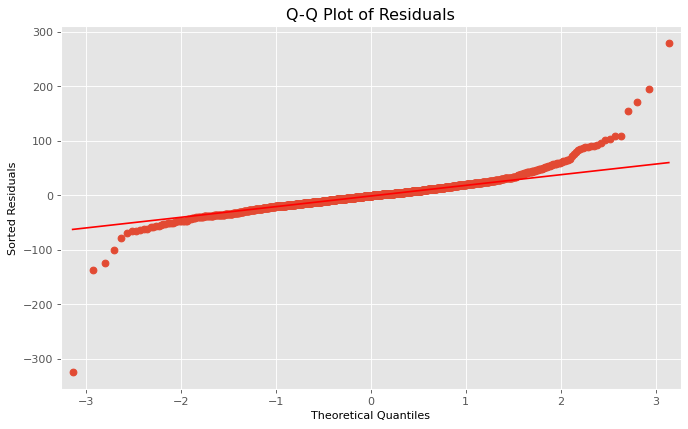

In [63]:
qq_plot_residuals(y_train, train_preds_lasso)

- We observe that the theoretical quantiles and the residual quantiles almost form an overlapping straight line indicating that the residuals are normally distributed.

In [64]:
lasso_resid = y_train - train_preds_lasso

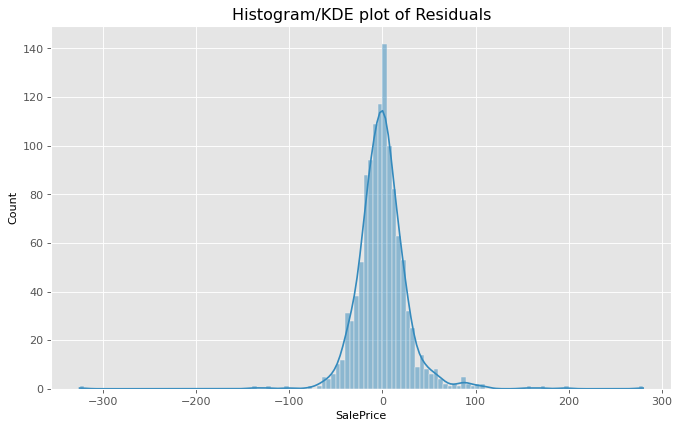

In [65]:
plt.figure(figsize=(10,6), dpi = 80)
sns.histplot(lasso_resid, kde = True)
plt.title('Histogram/KDE plot of Residuals')
plt.show()

- The distribution of residuals matches the normal distribution to a very significant extent.

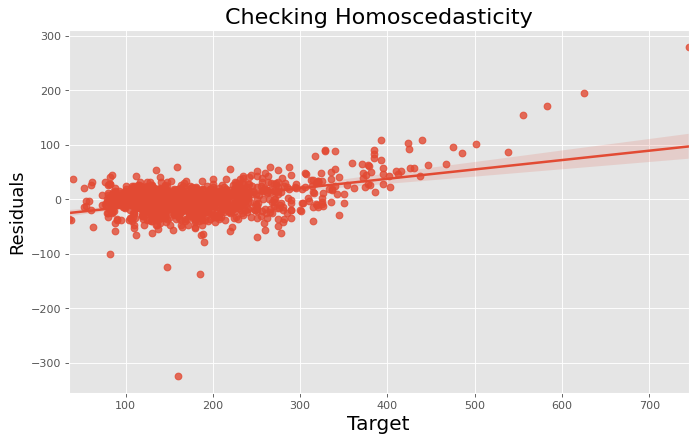

In [66]:
fig = plt.figure(figsize = (10, 6))
sns.regplot(x = y_train, y = lasso_resid)
plt.title('Checking Homoscedasticity', fontsize=20)      
plt.xlabel('Target', fontsize=18)                      
plt.ylabel('Residuals', fontsize=16)   
plt.show()

- The plot of Residuals v/s Target does not reveal any apparent heteroscedasticity.

In [67]:
print("Best Alpha for Ridge Regression: ", best_ridge_alpha)
print("Best Alpha for Lasso Regression: ", best_lasso_alpha)

Best Alpha for Ridge Regression:  100
Best Alpha for Lasso Regression:  1


In [68]:
#Creating the function to perform the Ridge or Lasso Regression on the 
# final X_train and y_train after VIF > 5 features have been removed.

def ridge_lasso_regression(X_train, X_test, y_train, method='ridge', alpha = 100):
    
    if method == 'ridge':
        model = Ridge(alpha = alpha)
    elif method == 'lasso':
        model = Lasso(alpha = alpha)
    else:
        print("ERROR")

    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    feature_importance = model.coef_
    
    #Getting the top features
    top_feature_indices = np.argsort(np.abs(feature_importance))[::-1]
    top_features = X_train.columns[top_feature_indices]
    
    #Top 5 features are extracted into a dictionary where key is the feature name and value is the coefficient.
    
    feature_coefficients = pd.DataFrame({'Feature': top_features, 
                                         'Coefficient': [round(feature_importance[i],2) for i in top_feature_indices]})
    
    train_r2 = round(r2_score(y_train, train_preds),2)
    test_r2 = round(r2_score(y_test, test_preds),2)
    train_rmse = round(np.sqrt(mean_squared_error(y_train, train_preds)),2)
    test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),2)
    
    metrics_df = pd.DataFrame({
    'Metric': ['Train R2', 'Test R2', 'Train RMSE', 'Test RMSE'],
    'Value': [train_r2, test_r2, train_rmse, test_rmse]
    })

    
    return model, train_preds, test_preds, feature_coefficients, metrics_df

In [69]:
#Using the alpha = 100, best alpha for ridge and alpha = 1, best for lasso found using GridSearchCV.

model_r, train_preds_r, test_preds_r, feature_coefficients_r, metrics_df_r = ridge_lasso_regression(X_train_r, X_test_r, y_train_r, method='ridge', alpha=100)
model_l, train_preds_l, test_preds_l, feature_coefficients_l, metrics_df_l = ridge_lasso_regression(X_train_l, X_test_l, y_train_l, method='lasso', alpha=1)

In [70]:
#Metrics for Ridge Regression
metrics_df_r

Metric  Value
0    Train R2   0.87
1     Test R2   0.85
2  Train RMSE  27.97
3   Test RMSE  34.34

In [71]:
print("Features in Ridge with non zero coefficients:", feature_coefficients_r[feature_coefficients_r['Coefficient'] != 0].shape[0])

Features in Ridge with non zero coefficients: 87


In [72]:
#Metrics for Lasso Regression
metrics_df_l

Metric  Value
0    Train R2   0.86
1     Test R2   0.85
2  Train RMSE  28.87
3   Test RMSE  33.89

In [73]:
print("Features in Ridge with non zero coefficients:", feature_coefficients_l[feature_coefficients_l['Coefficient'] != 0].shape[0])

Features in Ridge with non zero coefficients: 70


In [74]:
print('Top Features Ridge: Alpha = 100: \n\n', feature_coefficients_r.head())
print('\n')
print('Top Features Lasso: Alpha = 1: \n\n', feature_coefficients_l.head())

Top Features Ridge: Alpha = 100: 

                 Feature  Coefficient
0          TotRmsAbvGrd        12.89
1   OverallQualCondMean        11.12
2              FullBath         9.21
3            GarageArea         8.18
4  Neighborhood_NridgHt         8.12


Top Features Lasso: Alpha = 1: 

                 Feature  Coefficient
0          TotRmsAbvGrd        13.55
1   OverallQualCondMean        11.76
2  Neighborhood_NridgHt        10.25
3              FullBath         9.11
4  Neighborhood_NoRidge         8.66


- Doubling the optimal alpha to check the effect on features and coefficients

In [75]:
#Using the alpha = (2 x best alpha) to check the effect on the coefficients and best features.

model_2xr, train_preds_2xr, test_preds_2xr, feature_coefficients_2xr, metrics_df_2xr = ridge_lasso_regression(X_train_r, X_test_r, y_train_r, method='ridge', alpha=200)
model_2xl, train_preds_2xl, test_preds_2xl, feature_coefficients_2xl, metrics_df_2xl = ridge_lasso_regression(X_train_l, X_test_l, y_train_l, method='lasso', alpha=2)

In [76]:
print('Top Features Ridge: Alpha = 200: \n\n', feature_coefficients_2xr.head())
print('\n')
print('Top Features Lasso: Alpha = 2: \n\n', feature_coefficients_2xl.head())

Top Features Ridge: Alpha = 200: 

                Feature  Coefficient
0         TotRmsAbvGrd        11.62
1  OverallQualCondMean        10.75
2             FullBath         8.48
3           GarageArea         8.05
4          TotalBsmtSF         7.86


Top Features Lasso: Alpha = 2: 

                 Feature  Coefficient
0          TotRmsAbvGrd        12.89
1   OverallQualCondMean        12.14
2           KitchenQual         8.97
3  Neighborhood_NridgHt         8.93
4           TotalBsmtSF         8.58


In [77]:
#Creating a new Lasso model, without the top 5 features found in the previous step.

top_features_lasso = list(feature_coefficients_l['Feature'][:5])

X_new, y_new, X_train_new, X_test_new, y_train_new, y_test_new = split_data(df)

best_lnew_alpha, X_lnew, X_train_lnew, X_test_lnew, lnew_summary, train_preds_lnew, test_preds_lnew, feature_coefficients_lnew = address_vif(X_new, \
                                                                    X_train_new, y_train_new, X_test_new, y_test_new, 5, 'lasso', \
                                                                                                                     top_features_lasso)

Iteration 1 - Model created. VIF: 96.14. Dropped feature: SaleCondition_Partial
Iteration 2 - Model created. VIF: 16.68. Dropped feature: GarageType_NA
Iteration 3 - Model created. VIF: 8.15. Dropped feature: YearsSinceBuilt
Iteration 4 - Model created. VIF: 6.75. Dropped feature: GarageArea
Iteration 5 - Model created. VIF: 5.66. Dropped feature: Foundation_PConc
Iteration 6 - Model created. VIF: 5.51. Dropped feature: MSSubClass


In [78]:
print("Best Alpha for Lasso Regression without the top 5 features found previously: ", best_lnew_alpha)

Best Alpha for Lasso Regression without the top 5 features found previously:  0.1


In [79]:
lnew_summary

Model Number  Train R2  Test R2  Train RMSE  Test RMSE  \
0             1     0.871    0.850      27.746     33.874   
1             2     0.871    0.851      27.751     33.806   
2             3     0.870    0.851      27.813     33.838   
3             4     0.869    0.849      27.909     33.978   
4             5     0.869    0.849      27.909     33.978   
5             6     0.869    0.849      27.924     33.992   
6             7     0.864    0.844      28.479     34.558   

          Column Dropped    VIF  
0                    NaN    NaN  
1  SaleCondition_Partial  96.14  
2          GarageType_NA  16.68  
3        YearsSinceBuilt   8.15  
4             GarageArea   6.75  
5       Foundation_PConc   5.66  
6             MSSubClass   5.51

Here we can observe that by removing the features where VIF > 5, some of the overfitting has also been addressed.

In [80]:
#Obtaining the metrics for the New Lasso Model
model_lnew, train_preds_lnew, test_preds_lnew, feature_coefficients_lnew, metrics_df_lnew = ridge_lasso_regression(X_train_new, X_test_new, y_train_new, method='lasso', alpha=1)

In [81]:
metrics_df_lnew

Metric  Value
0    Train R2   0.80
1     Test R2   0.83
2  Train RMSE  34.23
3   Test RMSE  36.27

In [82]:
#Top 5 Features for the new Lasso model
print('Top Features the new Lasso Model without the Top 5 features found previously: Alpha = 0.1: \n\n', feature_coefficients_lnew.head())

Top Features the new Lasso Model without the Top 5 features found previously: Alpha = 0.1: 

             Feature  Coefficient
0       KitchenQual        15.34
1  BsmtQualCondMean         7.53
2      BsmtExposure         6.32
3        Functional         5.70
4   Condition1_Norm         4.66
